In [1]:
# 更改品种
import pandas as pd
import datetime
code = pd.read_csv('./data/code.csv')
com_1m_bar = pd.read_parquet('./data/com_1m_bar.parquet', engine = 'fastparquet')
com_1m_bar = com_1m_bar.reset_index()
# com_1m_bar = com_1m_bar[com_1m_bar.volume != 0]

# 1、根据上市时间筛选
# code['maturity_date'] = pd.to_datetime(code['maturity_date'])
# invalid_code = code[code.maturity_date > '2021-01-01'].underlying_symbol.tolist()

# 2、根据交易活跃程度筛选
invalid_code = ['BC', 'CJ', 'EB', 'EG', 'FU', 'I', 'JM', 'LG', 'LH', 'LU', 'NR', 'P',
               'PF', 'PG', 'PK', 'PX', 'RR', 'SA', 'SC', 'SH', 'SP', 'SS', 'UR', 'WR', 
               'PM', 'BB', 'RI', 'JR', 'LR', 'RS', 'WH']
# invalid_code += invalid_code_2

# valid_code = ['V', 'M', 'A', 'Y', 'J', 'L', 'C', 'P', 'AU', 
#               'AL', 'PB', 'CU', 'ZN', 'AG', 'RB', 'RU',
#               'TA', 'SR', 'FG', 'RM', 'OI', 'MA', 'CF']

com_1m_bar = com_1m_bar[~com_1m_bar['underlying_symbol'].isin(invalid_code)]

# 3、根据行业进行筛选
# com_1m_bar = com_1m_bar[com_1m_bar.trading_date >= '2021-01-02']
# com_1m_bar = com_1m_bar[com_1m_bar.trading_date <= '2021-12-31']
# chem = code[code.industry_name == '化工'].underlying_symbol.unique().tolist()
# energy = code[code.industry_name == '能源'].underlying_symbol.unique().tolist()
# testlist = chem + energy
# metal = code[code.industry_name == '焦煤钢矿'].underlying_symbol.unique()
# yo = code[code.industry_name == '油脂'].underlying_symbol.unique()
# agri = code[code.industry_name == '农产品'].underlying_symbol.unique()
# com_1m_bar = com_1m_bar[com_1m_bar.underlying_symbol.isin(chem)]
tick_size_dict = {
        'A': 1,      # 黄大豆1号
        'AG': 1,     # 白银
        'AL': 5,     # 铝
        'AP': 1,     # 苹果
        'AU': 0.02,  # 黄金
        'B': 1,      # 黄大豆2号
        'BC': 10,    # 国际铜
        'BU': 1,     # 沥青
        'C': 1,      # 玉米
        'CF': 5,     # 棉花
        'CJ': 5,     # 红枣
        'CS': 1,     # 玉米淀粉
        'CU': 10,    # 铜
        'CY': 5,     # 棉纱
        'EB': 1,     # 苯乙烯
        'EG': 1,     # 乙二醇
        'FG': 1,     # 玻璃
        'FB': 0.5,
        'FU': 1,     # 燃料油
        'HC': 1,     # 热轧卷板
        'I': 0.5,    # 铁矿石
        'J': 0.5,    # 焦炭
        'JD': 1,     # 鸡蛋
        'JM': 0.5,   # 焦煤
        'L': 1,      # 聚乙烯
        'LG': 1,     # 甲醇
        'LH': 5,     # 生猪
        'LU': 1,     # 低硫燃料油
        'M': 1,      # 豆粕
        'MA': 1,     # 甲醇
        'NI': 10,    # 镍
        'NR': 5,     # 20号胶
        'OI': 1,     # 菜籽油
        'P': 2,      # 棕榈油
        'PB': 5,     # 铅
        'PF': 2,     # 短纤
        'PG': 1,     # 液化石油气
        'PK': 1,     # 花生
        'PP': 1,     # 聚丙烯
        'PX': 1,     # 对二甲苯
        'RB': 1,     # 螺纹钢
        'RM': 1,     # 菜籽粕
        'RR': 1,     # 粳米
        'RU': 5,     # 天然橡胶
        'SA': 1,     # 纯碱
        'SC': 0.1,   # 原油
        'SF': 2,     # 硅铁
        'SH': 1,     # 烧碱
        'SM': 2,     # 锰硅
        'SN':10,      # xi
        'SP': 2,     # 纸浆
        'SR': 1,     # 白糖
        'SS': 5,     # 不锈钢
        'TA': 2,     # PTA
        'UR': 1,     # 尿素
        'V': 1,      # 聚氯乙烯
        'Y': 2,      # 豆油
        'ZC': 0.2,   # 动力煤
        'ZN': 5 ,     # 锌
        'WT': 1,
        'WS':1,
        'ER':1,
        'ME':1,
        'RO':2,
        'TC':0.2
    }

# com_1m_bar = com_1m_bar[
#     (com_1m_bar['datetime'].dt.time >= datetime.time(9, 0)) & 
#     (com_1m_bar['datetime'].dt.time <= datetime.time(15, 0))
# ]
# com_1m_bar = com_1m_bar[['underlying_symbol', 'date', 'close', 'spread_est']]
com_1m_bar = com_1m_bar[com_1m_bar.trading_date >= '2018-01-01']
# com_1m_bar = com_1m_bar[com_1m_bar['underlying_symbol'].isin(testlist)]
# com_1m_bar = com_1m_bar[['underlying_symbol', 'datetime', 'trading_date', 'close']]

com_1m_bar['tick_size'] = com_1m_bar['underlying_symbol'].map(tick_size_dict)
com_1m_bar['spread_est'] = com_1m_bar['tick_size'] / com_1m_bar['close']
com_1m_bar

,underlying_symbol,datetime,trading_date,volume,open_interest,low,open,high,close,total_turnover,dominant_id,tick_size,spread_est
0,A,2018-01-02 09:01:00,2018-01-02,5990.0,228856.0,2783.0,2783.0,2825.0,2820.0,0,A1805,1.0,0.000355
1,A,2018-01-02 09:02:00,2018-01-02,1282.0,229056.0,2812.0,2821.0,2821.0,2813.0,0,A1805,1.0,0.000355
2,A,2018-01-02 09:03:00,2018-01-02,2094.0,230098.0,2808.0,2813.0,2813.0,2812.0,0,A1805,1.0,0.000356
3,A,2018-01-02 09:04:00,2018-01-02,740.0,230334.0,2811.0,2812.0,2816.0,2815.0,0,A1805,1.0,0.000355
4,A,2018-01-02 09:05:00,2018-01-02,992.0,230592.0,2815.0,2816.0,2819.0,2817.0,0,A1805,1.0,0.000355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33827575,ZN,2024-12-31 14:56:00,2024-12-31,1084.0,136758.0,25365.0,25390.0,25390.0,25375.0,0,ZN2502,5.0,0.000197
33827576,ZN,2024-12-31 14:57:00,2024-12-31,510.0,136629.0,25360.0,25375.0,25375.0,25375.0,0,ZN2502,5.0,0.000197
33827577,ZN,2024-12-31 14:58:00,2024-12-31,486.0,136623.0,25370.0,25370.0,25385.0,25385.0,0,ZN2502,5.0,0.000197
33827578,ZN,2024-12-31 14:59:00,2024-12-31,439.0,136680.0,25375.0,25385.0,25385.0,25380.0,0,ZN2502,5.0,0.000197


### 获得spread

### Sorting R2 with vol/rv/openinterst

In [ ]:
import pandas as pd
import numpy as np
vol = pd.read_parquet('arbitrage_index.parquet', engine = 'fastparquet')
vol = vol.dropna()
vol_decile = vol.copy()
vol_decile['datetime'] = pd.to_datetime(vol_decile['datetime'])

vol_decile['vol_decile'] = (
    vol_decile
    .groupby('datetime', group_keys=False)['volume']
    .rank(method='first', pct=True)      
    .mul(5)                             
    .apply(np.ceil)                     
    .astype(int)
)

vol_decile['vol_decile_next'] = (
    vol_decile
    .groupby('underlying_symbol', group_keys=False)['vol_decile']
    .shift(-1)
)
vol_decile = vol_decile[['datetime', 'underlying_symbol', 'vol_decile_next']]

,underlying_symbol,datetime,AC_index,D_vol,D_volm,D_oi,rv_30m,volume,open_interest
index,,,,,,,,,
30,A,2018-01-02 09:31:00,24.0,9.0,8.0,7.0,0.002676,558.0,227694.0
31,A,2018-01-02 09:32:00,23.0,9.0,7.0,7.0,0.002625,374.0,227670.0
32,A,2018-01-02 09:33:00,24.0,9.0,8.0,7.0,0.002621,212.0,227670.0
33,A,2018-01-02 09:34:00,25.0,9.0,9.0,7.0,0.002619,190.0,227700.0
34,A,2018-01-02 09:35:00,23.0,9.0,7.0,7.0,0.002618,604.0,227424.0
...,...,...,...,...,...,...,...,...,...
33827575,ZN,2024-12-31 14:56:00,16.0,5.0,4.0,7.0,0.000423,1084.0,136758.0
33827576,ZN,2024-12-31 14:57:00,18.0,5.0,6.0,7.0,0.000423,510.0,136629.0
33827577,ZN,2024-12-31 14:58:00,18.0,5.0,6.0,7.0,0.000426,486.0,136623.0


In [ ]:
import pandas as pd
# prediction = pd.read_parquet('/mnt/all_rolling_predictions_gnnar_1min.parquet', engine = 'fastparquet')
prediction = pd.read_csv('/mnt/all_rolling_predictions_lasso_1min.csv')

codes = ['A', 'AG', 'AL', 'AP', 'AU', 'B', 'BU', 'C', 'CF', 'CS', 'CU', 'CY',
       'FB', 'FG', 'HC', 'J', 'JD', 'L', 'M', 'MA', 'NI', 'OI', 'PB', 'PP',
       'RB', 'RM', 'RU', 'SF', 'SM', 'SN', 'SR', 'TA', 'V', 'Y', 'ZC', 'ZN']

prediction['code'] = (
    prediction.groupby('datetime').cumcount()          
      .map(dict(enumerate(codes)))
)
prediction['datetime'] = pd.to_datetime(prediction['datetime'])
vol_decile.columns = ['datetime', 'code', 'vol_decile']
pre_2 = prediction.merge(vol_decile, 
                        on = ['datetime', 'code'],
                        how = 'inner')
pre_2

In [10]:
# 对arbitrage index进行排序
import pandas as pd
import numpy as np
ai = pd.read_parquet('arbitrage_index.parquet', engine = 'fastparquet')
ai = ai[['datetime', 'underlying_symbol', 'AC_index']]
ai = ai.dropna()

ai['datetime'] = pd.to_datetime(ai['datetime'])

ai['ac_decile'] = (
    ai
    .groupby('datetime', group_keys=False)['AC_index']
    .rank(method='first', pct=True)      # 先得到 0–1 之间的百分位
    .mul(5)                             # 扩大到 0–10
    .apply(np.ceil)                      # 取上整，变成 1–10
    .astype(int)
)

ai['vol_decile_next'] = (
    ai
    .groupby('underlying_symbol', group_keys=False)['ac_decile']
    .shift(-1)
)

ai = ai[['datetime', 'underlying_symbol', 'vol_decile_next']]
ai

,datetime,underlying_symbol,vol_decile_next
index,,,
30,2018-01-02 09:31:00,A,5.0
31,2018-01-02 09:32:00,A,5.0
32,2018-01-02 09:33:00,A,5.0
33,2018-01-02 09:34:00,A,5.0
34,2018-01-02 09:35:00,A,5.0
...,...,...,...
33827575,2024-12-31 14:56:00,ZN,4.0
33827576,2024-12-31 14:57:00,ZN,4.0
33827577,2024-12-31 14:58:00,ZN,4.0


In [3]:
sector = pd.read_parquet('./data/sector_bar_1m.parquet', engine = 'fastparquet')
sector = sector.loc['159981.XSHE'].reset_index()
sector["datetime"] = pd.to_datetime(sector["datetime"])
sector["trading_date"] = sector["datetime"].dt.date
sector['underlying_symbol'] = 'y'
sector =  sector[['underlying_symbol', 'datetime', 'trading_date', 'close']]
sector

,underlying_symbol,datetime,trading_date,close
0,y,2020-01-17 09:31:00,2020-01-17,0.990
1,y,2020-01-17 09:32:00,2020-01-17,1.005
2,y,2020-01-17 09:33:00,2020-01-17,1.005
3,y,2020-01-17 09:34:00,2020-01-17,1.002
4,y,2020-01-17 09:35:00,2020-01-17,0.999
...,...,...,...,...
288235,y,2024-12-31 14:56:00,2024-12-31,1.447
288236,y,2024-12-31 14:57:00,2024-12-31,1.448
288237,y,2024-12-31 14:58:00,2024-12-31,1.448
288238,y,2024-12-31 14:59:00,2024-12-31,1.448


In [11]:
com_1m_bar = pd.concat([com_1m_bar, sector], axis=0, ignore_index=True)
com_1m_bar

,underlying_symbol,datetime,trading_date,close
0,BU,2018-01-02 09:01:00,2018-01-02 00:00:00,2568.000
1,BU,2018-01-02 09:02:00,2018-01-02 00:00:00,2568.000
2,BU,2018-01-02 09:03:00,2018-01-02 00:00:00,2568.000
3,BU,2018-01-02 09:04:00,2018-01-02 00:00:00,2574.000
4,BU,2018-01-02 09:05:00,2018-01-02 00:00:00,2574.000
...,...,...,...,...
2964160,y,2024-12-31 14:56:00,2024-12-31,1.447
2964161,y,2024-12-31 14:57:00,2024-12-31,1.448
2964162,y,2024-12-31 14:58:00,2024-12-31,1.448
2964163,y,2024-12-31 14:59:00,2024-12-31,1.448


In [15]:
pivot_spread = com_1m_bar.pivot(index="datetime", columns="underlying_symbol", values="spread_est")
pivot_spread

underlying_symbol,A,AG,AL,AP,AU,B,BU,C,CF,CS,...,RU,SF,SM,SN,SR,TA,V,Y,ZC,ZN
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-02 09:01:00,0.000355,0.000209,0.000380,0.000171,0.000061,0.001294,0.000389,0.000454,0.000274,0.000360,...,0.000196,0.000364,0.000358,0.000098,0.000186,0.000465,0.000173,0.000781,0.000881,0.000294
2018-01-02 09:02:00,0.000355,0.000209,0.000381,0.000171,0.000061,0.001261,0.000389,0.000455,0.000274,0.000361,...,0.000195,0.000362,0.000354,0.000098,0.000186,0.000464,0.000173,0.000784,0.000878,0.000294
2018-01-02 09:03:00,0.000356,0.000209,0.000382,0.000171,0.000061,0.001261,0.000389,0.000454,0.000274,0.000361,...,0.000195,0.000361,0.000354,0.000098,0.000186,0.000465,0.000173,0.000782,0.000861,0.000294
2018-01-02 09:04:00,0.000355,0.000209,0.000381,0.000171,0.000061,0.001261,0.000389,0.000454,0.000274,0.000361,...,0.000195,0.000360,0.000354,0.000098,0.000186,0.000465,0.000173,0.000781,0.000868,0.000295
2018-01-02 09:05:00,0.000355,0.000209,0.000380,0.000171,0.000061,0.001261,0.000389,0.000453,0.000274,0.000360,...,0.000195,0.000360,0.000354,0.000097,0.000185,0.000464,0.000172,0.000778,0.000870,0.000294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 14:56:00,0.000254,0.000133,0.000252,0.000141,0.000032,0.000301,0.000270,0.000449,0.000370,0.000389,...,0.000281,0.000322,0.000329,0.000041,0.000168,0.000409,0.000189,0.000259,0.000250,0.000197
2024-12-31 14:57:00,0.000254,0.000133,0.000252,0.000141,0.000032,0.000301,0.000270,0.000449,0.000370,0.000389,...,0.000281,0.000322,0.000329,0.000041,0.000168,0.000409,0.000189,0.000259,0.000250,0.000197
2024-12-31 14:58:00,0.000254,0.000133,0.000252,0.000141,0.000032,0.000301,0.000270,0.000449,0.000371,0.000389,...,0.000281,0.000322,0.000328,0.000041,0.000168,0.000409,0.000189,0.000259,0.000250,0.000197


In [51]:
import numpy as np
com_1m_bar["log_close"] = np.log(com_1m_bar["close"])
com_1m_bar["log_ret"]   = com_1m_bar.groupby("underlying_symbol")["log_close"].diff()
pivot_ret = com_1m_bar.pivot(index="datetime", columns="underlying_symbol", values="log_ret")
pivot_ret

/tmp/ipykernel_112/3346959469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_1m_bar["log_close"] = np.log(com_1m_bar["close"])
/tmp/ipykernel_112/3346959469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_1m_bar["log_ret"]   = com_1m_bar.groupby("underlying_symbol")["log_close"].diff()


underlying_symbol,AG,AL,AU,CU,NI,PB,SN,ZN
datetime,,,,,,,,
2018-01-02 09:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 09:02:00,0.001252,-0.003044,0.000305,-0.000377,-0.001128,-0.002099,0.000685,-0.002059
2018-01-02 09:03:00,-0.001252,-0.003053,-0.001068,-0.000565,-0.003109,0.000700,-0.000880,0.000294
2018-01-02 09:04:00,0.000626,0.003815,0.000458,-0.000377,-0.003118,0.000000,-0.000196,-0.001768
2018-01-02 09:05:00,0.000000,0.002282,-0.000153,0.000942,-0.000852,0.001050,0.004979,0.003533
...,...,...,...,...,...,...,...,...
2024-12-31 14:56:00,-0.000133,0.000252,0.000193,0.000135,-0.000558,-0.000297,0.000041,-0.000591
2024-12-31 14:57:00,-0.000133,-0.000252,0.000129,0.000270,-0.000398,0.000593,0.000245,0.000000
2024-12-31 14:58:00,0.000000,0.000000,0.000097,-0.000135,0.000717,-0.000593,0.000816,0.000394


In [52]:
idx = pivot_ret.index.time
mask = ~(
    (idx >= datetime.time(1, 0)) &
    (idx <= datetime.time(2, 30))
)
pivot_ret = pivot_ret[mask]
pivot_ret

underlying_symbol,AG,AL,AU,CU,NI,PB,SN,ZN
datetime,,,,,,,,
2018-01-02 09:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 09:02:00,0.001252,-0.003044,0.000305,-0.000377,-0.001128,-0.002099,0.000685,-0.002059
2018-01-02 09:03:00,-0.001252,-0.003053,-0.001068,-0.000565,-0.003109,0.000700,-0.000880,0.000294
2018-01-02 09:04:00,0.000626,0.003815,0.000458,-0.000377,-0.003118,0.000000,-0.000196,-0.001768
2018-01-02 09:05:00,0.000000,0.002282,-0.000153,0.000942,-0.000852,0.001050,0.004979,0.003533
...,...,...,...,...,...,...,...,...
2024-12-31 14:56:00,-0.000133,0.000252,0.000193,0.000135,-0.000558,-0.000297,0.000041,-0.000591
2024-12-31 14:57:00,-0.000133,-0.000252,0.000129,0.000270,-0.000398,0.000593,0.000245,0.000000
2024-12-31 14:58:00,0.000000,0.000000,0.000097,-0.000135,0.000717,-0.000593,0.000816,0.000394


In [53]:
times_bad = {"09:01", "21:01", "23:00", "15:00"}
pivot_ret = pivot_ret[~pivot_ret.index.strftime("%H:%M").isin(times_bad)]
pivot_ret

underlying_symbol,AG,AL,AU,CU,NI,PB,SN,ZN
datetime,,,,,,,,
2018-01-02 09:02:00,0.001252,-0.003044,0.000305,-0.000377,-0.001128,-0.002099,0.000685,-0.002059
2018-01-02 09:03:00,-0.001252,-0.003053,-0.001068,-0.000565,-0.003109,0.000700,-0.000880,0.000294
2018-01-02 09:04:00,0.000626,0.003815,0.000458,-0.000377,-0.003118,0.000000,-0.000196,-0.001768
2018-01-02 09:05:00,0.000000,0.002282,-0.000153,0.000942,-0.000852,0.001050,0.004979,0.003533
2018-01-02 09:06:00,-0.000209,-0.001140,0.000000,-0.000188,0.004536,0.001398,0.003597,0.001468
...,...,...,...,...,...,...,...,...
2024-12-31 14:55:00,0.000266,0.000000,0.000161,-0.000135,0.000956,0.000594,-0.000286,0.000394
2024-12-31 14:56:00,-0.000133,0.000252,0.000193,0.000135,-0.000558,-0.000297,0.000041,-0.000591
2024-12-31 14:57:00,-0.000133,-0.000252,0.000129,0.000270,-0.000398,0.000593,0.000245,0.000000


In [1]:
import numpy as np
import pandas as pd
import datetime
com_1m_bar = pd.read_parquet('/mnt/data/com_30m_bar.parquet', engine = 'fastparquet')
com_1m_bar = com_1m_bar.reset_index()
invalid_code = ['BC', 'CJ', 'EB', 'EG', 'FU', 'I', 'JM', 'LG', 'LH', 'LU', 'NR', 'P',
               'PF', 'PG', 'PK', 'PX', 'RR', 'SA', 'SC', 'SH', 'SP', 'SS', 'UR', 'WR', 
               'PM', 'BB', 'RI', 'JR', 'LR', 'RS', 'WH']
com_1m_bar = com_1m_bar[~com_1m_bar['underlying_symbol'].isin(invalid_code)]
com_1m_bar = com_1m_bar[
    (com_1m_bar['datetime'].dt.time >= datetime.time(9, 0)) & 
    (com_1m_bar['datetime'].dt.time <= datetime.time(15, 0))
]
com_1m_bar = com_1m_bar[com_1m_bar.trading_date >= '2018-01-01']

com_1m_bar["log_close"] = np.log(com_1m_bar["close"])
com_1m_bar["log_ret"]   = com_1m_bar.groupby("underlying_symbol")["log_close"].diff()
pivot_ret = com_1m_bar.pivot(index="datetime", columns="underlying_symbol", values="log_ret").iloc[1:,:]

df = pivot_ret.copy()
df.reset_index(inplace = True)
df['date'] = df['datetime'].dt.date
df_cleaned = df.groupby('date', group_keys=False).apply(lambda group: group.iloc[1:-1])
df_cleaned = df_cleaned.drop(columns=['date'])
df_cleaned.set_index('datetime', inplace = True)
df_cleaned

underlying_symbol,A,AG,AL,AP,AU,B,BU,C,CF,CS,...,RU,SF,SM,SN,SR,TA,V,Y,ZC,ZN
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-02 10:15:00,-0.000349,0.000000,-0.005761,0.000176,0.000153,0.002981,0.000774,0.000443,0.000542,0.001066,...,0.000578,-0.001456,-0.000703,-0.000973,0.000948,0.001859,0.004937,0.002287,0.000875,-0.006552
2018-01-02 11:00:00,-0.002796,-0.001253,-0.003086,-0.001410,-0.000610,0.001982,0.006168,-0.002218,0.000271,-0.000355,...,-0.000771,0.004360,0.000000,0.000487,-0.000569,0.006017,-0.004113,0.000761,-0.001751,0.000597
2018-01-02 11:30:00,0.000000,-0.000627,0.000000,0.001410,0.000000,-0.001982,0.003070,0.000888,0.001083,0.000000,...,0.001541,0.013326,0.007706,0.001653,-0.000759,0.002765,0.003292,-0.001523,0.013061,0.004469
2018-01-02 14:00:00,0.004191,0.001045,-0.001934,-0.000528,-0.000153,-0.000993,0.006873,0.000000,-0.000812,-0.001422,...,-0.002892,-0.001074,0.000349,-0.005260,-0.009152,-0.000921,-0.011568,-0.006116,0.001729,-0.002679
2018-01-02 14:30:00,-0.000349,0.000627,0.001161,0.000705,0.000610,-0.002984,0.000761,0.000000,0.000000,-0.000712,...,0.000772,0.000358,0.001046,0.002828,-0.000766,0.001381,0.004974,0.001533,0.012870,0.005054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 10:15:00,0.000253,0.000800,0.001263,-0.000578,-0.000420,0.001129,-0.001627,-0.000440,0.000732,0.000000,...,-0.001669,-0.000328,-0.002635,-0.000891,0.001377,-0.002454,-0.000185,0.000779,0.000000,-0.000200
2024-12-31 11:00:00,0.001262,-0.000533,0.001261,-0.006669,-0.000226,0.001691,0.001085,-0.001321,-0.000366,-0.000385,...,0.001391,-0.004602,-0.000990,-0.001216,0.002062,0.002045,0.000000,0.002591,0.000000,0.001803
2024-12-31 11:30:00,-0.001262,0.001067,-0.000504,-0.001893,-0.000032,-0.000563,0.000813,-0.000882,0.000000,-0.000770,...,0.000278,0.000000,-0.002645,-0.001177,0.000686,0.003264,0.000922,-0.004149,0.000000,0.002399


In [19]:
import pipelinev3 as pp
pp.calc_r2_os_with_benchmark_zero(prediction)

0.010937999553029876

#### BENCHMARK

In [11]:
import benchmark as bm
import pipelinev3 as pp
import datetime
symbols = list(df_cleaned.columns)
start_date = datetime.datetime(2018, 1, 1)
end_date   = datetime.datetime(2024, 12, 31)
all_preds = {}

for sym in symbols:
    print(f"开始处理 symbol: {sym}")
    preds = bm.rolling_forecast_ar(df_cleaned, target=sym, start_date=start_date, end_date=end_date, lag=2)
    r2_os_value = pp.calc_r2_os_with_benchmark_zero(preds)
    print("Out-of-sample R^2 (compared to 0):", r2_os_value)
    all_preds[f"pred_{sym}"] = preds

final_preds = pd.concat(all_preds, axis=0, ignore_index=True)
final_preds.to_parquet("/mnt/all_rolling_predictions_ar_30min.parquet", engine = 'fastparquet')

开始处理 symbol: A
Out-of-sample R^2 (compared to 0): -0.011639486463488335
开始处理 symbol: AG
Out-of-sample R^2 (compared to 0): -0.008698662958831704
开始处理 symbol: AL
Out-of-sample R^2 (compared to 0): -0.00967104010558928
开始处理 symbol: AP
Out-of-sample R^2 (compared to 0): -0.01085816719464705
开始处理 symbol: AU
Out-of-sample R^2 (compared to 0): -0.015374047001733615
开始处理 symbol: B
Out-of-sample R^2 (compared to 0): -0.00677504390766015
开始处理 symbol: BU
Out-of-sample R^2 (compared to 0): -0.018163079134365434
开始处理 symbol: C
Out-of-sample R^2 (compared to 0): -0.014486139350789795
开始处理 symbol: CF
Out-of-sample R^2 (compared to 0): -0.015838272712914048
开始处理 symbol: CS
Out-of-sample R^2 (compared to 0): -0.010435899604909427
开始处理 symbol: CU
Out-of-sample R^2 (compared to 0): -0.015217202547496367
开始处理 symbol: CY
Out-of-sample R^2 (compared to 0): -0.019350371496896113
开始处理 symbol: FB
Out-of-sample R^2 (compared to 0): -0.012042912575606524
开始处理 symbol: FG
Out-of-sample R^2 (compared to 0): -0.011

In [41]:
final_preds = pd.read_parquet('predictions_bm.parquet')
# final_preds.columns = ['datetime', 'y_true', 'ar_pred']
final_preds['code'] = (
    final_preds.groupby('datetime').cumcount()          
      .map(dict(enumerate(codes)))
)
final_preds

,datetime,y_true,ar_pred,code
0,2018-03-01 09:02:00,0.000000,4.985307e-05,A
1,2018-03-01 09:03:00,-0.000695,1.424710e-05,A
2,2018-03-01 09:04:00,-0.000695,1.014981e-04,A
3,2018-03-01 09:05:00,0.000348,1.335571e-04,A
4,2018-03-01 09:06:00,-0.000348,-2.139174e-05,A
...,...,...,...,...
12909019,2024-12-30 14:55:00,0.000000,-5.669763e-06,ZN
12909020,2024-12-30 14:56:00,0.000198,3.466678e-07,ZN
12909021,2024-12-30 14:57:00,0.000000,-2.254555e-06,ZN
12909022,2024-12-30 14:58:00,-0.000198,3.463297e-07,ZN


In [34]:
import pipelinev3 as pp
final_preds.rename(columns = {'ar_pred':'y_pred'}, inplace = True)
pp.calc_r2_os_with_benchmark_zero(final_preds)

0.00846994296246495

#### Chico R square

In [75]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def measure_daily_r2_with_ci(df: pd.DataFrame):
    df = df.copy()
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['date']     = df['datetime'].dt.date

    records = []
    for date, g in df.groupby('date'):
        if len(g) < 5:
            continue

        z = (g['y_pred'] - g['y_pred'].mean()) / g['y_pred'].std(ddof=0)
        y = g['y_true']
        X = sm.add_constant(z)
        model = sm.OLS(y, X, missing='drop')
        res   = model.fit()

        r2       = res.rsquared
        ci_lower = res.conf_int(alpha=0.05).loc['y_pred', 0]
        ci_upper = res.conf_int(alpha=0.05).loc['y_pred', 1]
        p_value  = res.pvalues['y_pred']

        records.append({
            'date'     : date,
            'r2'       : r2,
            'ci_lower' : ci_lower,
            'ci_upper' : ci_upper,
            'p_value'  : p_value
        })

    daily = pd.DataFrame.from_records(records).set_index('date').sort_index()


    mean_r2 = daily['r2'].mean()
    se_r2   = daily['r2'].std(ddof=1) / np.sqrt(len(daily))
    tval    = 1.96  # 95% 双侧
    r2_ci   = (mean_r2 - tval*se_r2, mean_r2 + tval*se_r2)
    t_stat  = mean_r2 / se_r2 
    p_one_sided = 1 - stats.t.cdf(t_stat, df=len(daily)-1)

    summary = {
        'mean_r2'   : mean_r2,
        'r2_ci_low' : r2_ci[0],
        'r2_ci_high': r2_ci[1],
        'p_value': p_one_sided
    }
    return daily, summary

# daily_metrics, overall = measure_daily_r2_with_ci(prediction)
# print(daily_metrics.head())
# print(f"\n平均 R² = {overall['mean_r2']:.4f}, 95% CI = [{overall['r2_ci_low']:.4f}, {overall['r2_ci_high']:.4f}]")

In [92]:
final_preds = pd.read_parquet('/mnt/nl_ens.parquet')
codes = ['A', 'AG', 'AL', 'AP', 'AU', 'B', 'BU', 'C', 'CF', 'CS', 'CU', 'CY',
       'FB', 'FG', 'HC', 'J', 'JD', 'L', 'M', 'MA', 'NI', 'OI', 'PB', 'PP',
       'RB', 'RM', 'RU', 'SF', 'SM', 'SN', 'SR', 'TA', 'V', 'Y', 'ZC', 'ZN']
final_preds['code'] = (
    final_preds.groupby('datetime').cumcount()          
      .map(dict(enumerate(codes)))
)

daily_metrics, overall = measure_daily_r2_with_ci(final_preds)
print(daily_metrics.head())
print(f"\n平均 R² = {overall['mean_r2']:.4f}, 95% CI = [{overall['r2_ci_low']:.4f}, {overall['r2_ci_high']:.4f}], R2 = {overall['p_value']:.4f} ")

                  r2  ci_lower  ci_upper       p_value
date                                                  
2018-04-02  0.003353  0.000130  0.000287  2.079251e-07
2018-04-03  0.002949  0.000078  0.000184  1.125402e-06
2018-04-04  0.000376 -0.000007  0.000123  8.243216e-02
2018-04-09  0.001167 -0.000171 -0.000037  2.204720e-03
2018-04-10  0.011525  0.000188  0.000283  5.140256e-22

平均 R² = 0.0127, 95% CI = [0.0121, 0.0133], R2 = 0.0000 


####  ALL LAGS VERSUS OWN LAG

In [69]:
prediction = pd.read_parquet('predictions_bm.parquet')
prediction['datetime'] = pd.to_datetime(prediction['datetime'])
prediction.columns = ['datetime', 'y_true', 'y_pred', 'code']
daily_metrics_bm, overall = measure_daily_r2_with_ci(prediction)

In [93]:
prediction = pd.read_parquet('predictions_bm.parquet')
prediction['datetime'] = pd.to_datetime(prediction['datetime'])
prediction = prediction.merge(final_preds,
                             on = ['datetime', 'code'],
                             how = 'inner')
prediction = prediction[['datetime', 'y_true_x', 'y_pred', 'ar_pred']]
prediction.columns = ['datetime', 'y_true', 'y_pred', 'ar_pred']

In [94]:
import statsmodels.api as sm

def measure_daily_r2_with_two_preds(df: pd.DataFrame):
    df = df.copy()
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['date']     = df['datetime'].dt.date

    records = []
    for date, g in df.groupby('date'):
        if len(g) < 5:
            continue
        z_y  = (g['y_pred']  - g['y_pred'].mean())  / g['y_pred'].std(ddof=0)
        z_ar = (g['ar_pred'] - g['ar_pred'].mean()) / g['ar_pred'].std(ddof=0)
        y    = g['y_true']

        X = sm.add_constant(pd.DataFrame({'z_y': z_y, 'z_ar': z_ar}))
        model = sm.OLS(y, X, missing='drop')
        res   = model.fit()

        r2 = res.rsquared
        ci = res.conf_int(alpha=0.05)
        p  = res.pvalues

        records.append({
            'date'        : date,
            'r2'          : r2,
            'ci_lower_y'  : ci.loc['z_y', 0],
            'ci_upper_y'  : ci.loc['z_y', 1],
            'p_y'         : p['z_y'],
            'ci_lower_ar' : ci.loc['z_ar', 0],
            'ci_upper_ar' : ci.loc['z_ar', 1],
            'p_ar'        : p['z_ar']
        })

    daily = (
        pd.DataFrame.from_records(records)
          .set_index('date')
          .sort_index()
    )

    # 全样本平均 R^2 及其 95% CI
    mean_r2 = daily['r2'].mean()
    se_r2   = daily['r2'].std(ddof=1) / np.sqrt(len(daily))
    tval    = 1.96
    r2_ci   = (mean_r2 - tval * se_r2, mean_r2 + tval * se_r2)

    summary = {
        'mean_r2'   : mean_r2,
        'r2_ci_low' : r2_ci[0],
        'r2_ci_high': r2_ci[1]
    }

    return daily, summary

daily_metrics_both, overall = measure_daily_r2_with_two_preds(prediction)
print(daily_metrics_both.head())
print(f"\n平均 R² = {overall['mean_r2']:.4f}, 95% CI = [{overall['r2_ci_low']:.4f}, {overall['r2_ci_high']:.4f}]")

                  r2  ci_lower_y  ci_upper_y           p_y  ci_lower_ar  \
date                                                                      
2018-04-02  0.003614    0.000155    0.000422  2.380147e-05    -0.000233   
2018-04-03  0.005455   -0.000092    0.000070  7.989902e-01     0.000105   
2018-04-04  0.000413   -0.000076    0.000143  5.519766e-01    -0.000079   
2018-04-09  0.001488   -0.000144    0.000041  2.761645e-01    -0.000168   
2018-04-10  0.012364    0.000230    0.000363  2.036942e-18    -0.000154   

            ci_upper_ar      p_ar  
date                               
2018-04-02     0.000035  0.147394  
2018-04-03     0.000267  0.000007  
2018-04-04     0.000140  0.585473  
2018-04-09     0.000017  0.108458  
2018-04-10    -0.000022  0.009068  

平均 R² = 0.0148, 95% CI = [0.0142, 0.0155]


In [95]:
r2_ar = daily_metrics_bm['r2']
r2_both = daily_metrics_both['r2']

from scipy import stats

def compare_r2_paired(r2_1: pd.Series, r2_2: pd.Series):
    df = pd.concat([r2_1, r2_2], axis=1, keys=['r2_1','r2_2']).dropna()
    d = df['r2_1'] - df['r2_2']
    n = len(d)
    mean_diff = d.mean()
    sd = d.std(ddof=1)
    se = sd / np.sqrt(n)
    
    # 2. 95% 置信区间
    t_crit = stats.t.ppf(0.975, df=n-1)
    ci_low  = mean_diff - t_crit * se
    ci_high = mean_diff + t_crit * se
    
    # 3. 配对 t‑检验 p‑value
    t_stat, p_value = stats.ttest_rel(df['r2_1'], df['r2_2'])
    
    return {
        'mean_diff': mean_diff,
        'ci_low'   : ci_low,
        'ci_high'  : ci_high,
        'p_value'  : p_value
    }

res = compare_r2_paired(r2_both, r2_ar)
print(f"平均差 = {res['mean_diff']:.4f}")
print(f"95% CI = [{res['ci_low']:.4f}, {res['ci_high']:.4f}]")
print(f"p‑value = {res['p_value']:.3e}")

平均差 = 0.0030
95% CI = [0.0028, 0.0033]
p‑value = 1.030e-104


#### OOS R square

In [21]:
# 根据每分钟和每天看OOS R发方
import numpy as np
def calc_r2_os_with_benchmark_zero(preds: pd.DataFrame) -> float:
    sse_model = np.sum((preds["y_true"] - preds["y_pred"])**2)
    sse_bench = np.sum(preds["y_true"]**2)
    return 1 - sse_model / sse_bench

# calc_r2_os_with_benchmark_zero(prediction)

# df = prediction.copy()
# df['datetime'] = pd.to_datetime(df['datetime'])
# # 根据分钟分组
# df['time'] = df['datetime'].dt.strftime('%H:%M')
# 根据半小时分组
# df['time'] = df['datetime'].dt.floor('30T').dt.strftime('%H:%M')
# 根据一天分组
# df['time'] = df['datetime'].dt.date
# 根据月分组
# df['time'] = df['datetime'].dt.to_period('M').astype(str)
# 根据年分组
# df['time'] = df['datetime'].dt.year.astype(str)

# 根据周一-周五分组
# df['time'] = df['datetime'].dt.weekday
# df = df[df['time'] < 5]

# 根据每月的每一天分组，测试PMI会不会影响
# df['time'] = df['datetime'].dt.day


r2_by_minute = (
    pre_2.groupby('vol_decile', group_keys=False)
      .apply(calc_r2_os_with_benchmark_zero)
      .rename('r2_os')
)


# r2_by_month = (
#     df.groupby(["code", "time"], group_keys=False)
#       .apply(calc_r2_os_with_benchmark_zero)
#       .rename('r2_os')
# )


# r2_by_month = (
#     df.groupby('time', group_keys=False)
#       .apply(calc_r2_os_with_benchmark_zero)
#       .rename('r2_os')
# )


r2_by_minute = r2_by_minute.reset_index()
print(r2_by_minute.head())

   vol_decile     r2_os
0         1.0  0.020200
1         2.0  0.018407
2         3.0  0.018508
3         4.0  0.016953
4         5.0  0.001906


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


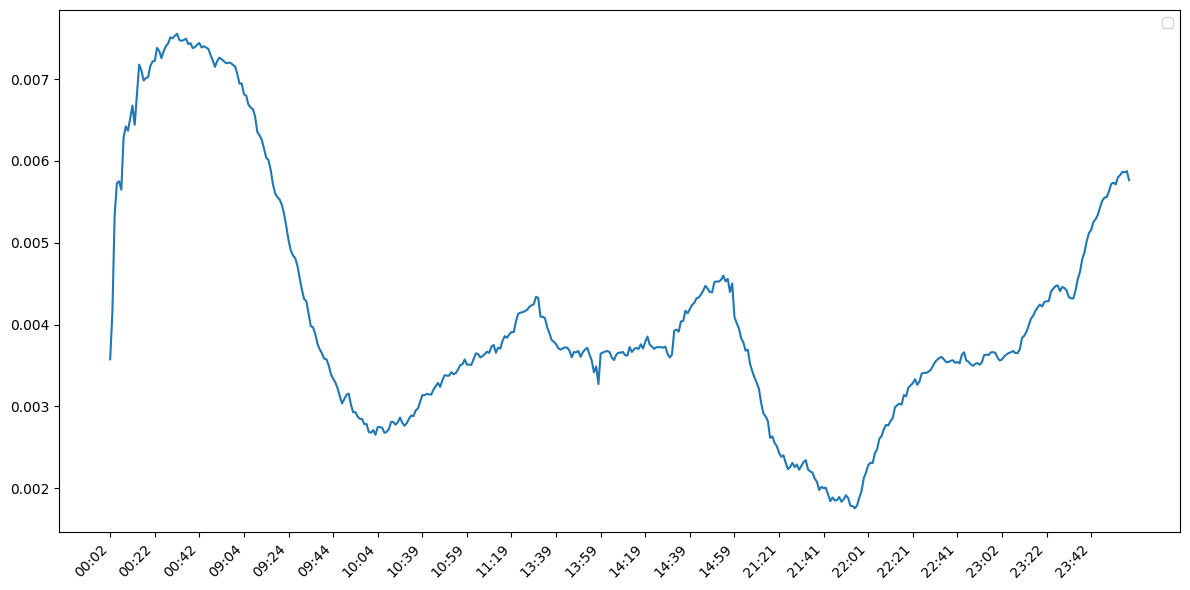

In [10]:
import matplotlib.pyplot as plt
df_smoothed = r2_by_month.copy()
df_smoothed['r2_os'] = df_smoothed['r2_os'].rolling(window=60, min_periods=1).mean()

# 2. 绘图
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_smoothed['time'], df_smoothed['r2_os'])

# 3. 控制 x 轴刻度：每隔 20 个点画一个
step = 20
pos = list(range(0, len(df_smoothed), step))
labels = df_smoothed['time'].iloc[pos]
ax.set_xticks(pos)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
plt.tight_layout()

# 4. 保存
plt.savefig('night_oos_plot.png', dpi=300)
plt.show()

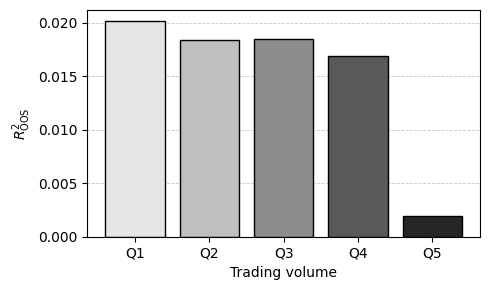

In [23]:
import matplotlib.pyplot as plt

vol_decile = [1, 2, 3, 4, 5]
r2_os      = r2_by_minute.r2_os.values.tolist()
colors = ['0.90', '0.75', '0.55', '0.35', '0.15']
labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

fig, ax = plt.subplots(figsize=(5, 3))

bars = ax.bar(vol_decile, r2_os,
              color=colors, edgecolor='black')

ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)

# 轴标签
ax.set_xlabel('Trading volume')
ax.set_ylabel(r'$R^2_{\mathrm{OOS}}$')

# X 轴刻度标签
ax.set_xticks(vol_decile)
ax.set_xticklabels(labels)


plt.tight_layout()
plt.savefig("r2_os_by_volume.png", dpi=300) 
plt.show()

In [47]:
r2_lasso['r2_pls'] = r2_by_minute['r2_os'].values

<Axes: xlabel='time'>

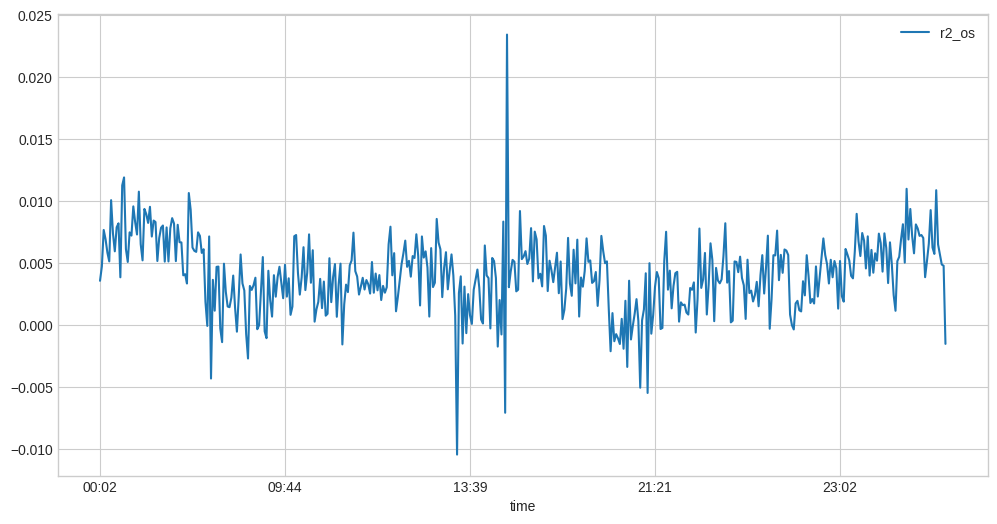

In [74]:
r2_by_minute.plot(figsize = (12,6))

In [70]:
r2_by_minute = r2_by_minute.set_index('time')

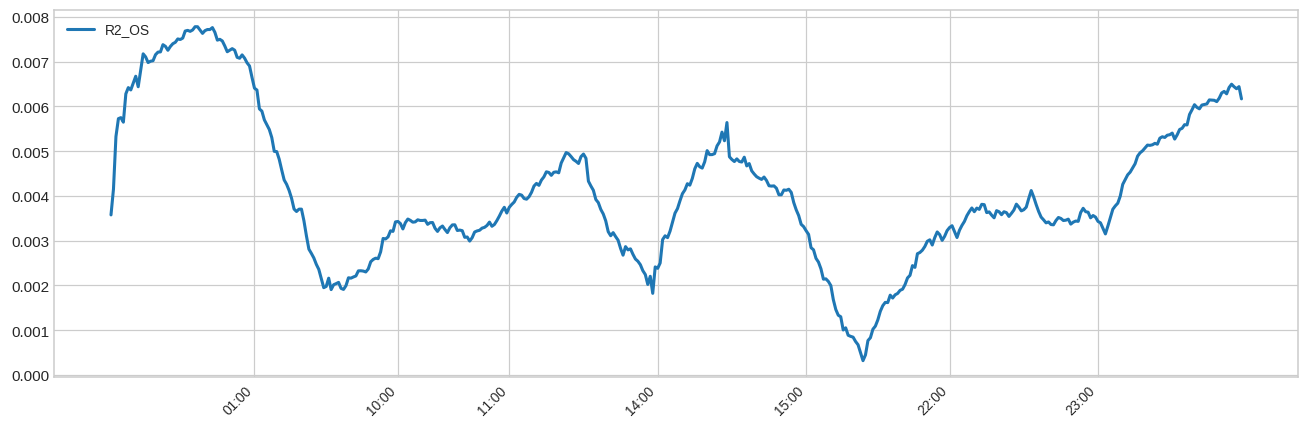

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# 1) 30‑min MA（窗口＝30 行）
ma30 = r2_by_minute.rolling(window=30, min_periods=1).mean()

# 2) 绘图
fig, ax = plt.subplots(figsize=(12,4), dpi=110)
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd']

for c, col in zip(colors, ma30.columns):
    ax.plot(ma30.index, ma30[col], label=col.upper(), color=c, lw=2)

# ——把 x 轴只留下整点刻度——
# 找出索引里以 ':00' 结尾的标签（09:00、10:00 …）
xticks = [t for t in ma30.index if t.endswith(':00')]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45, ha='right', fontsize=9)

ax.legend(frameon=False, ncol=len(ma30.columns), fontsize=9, loc='upper left')
plt.tight_layout()
plt.show()

<Axes: xlabel='time'>

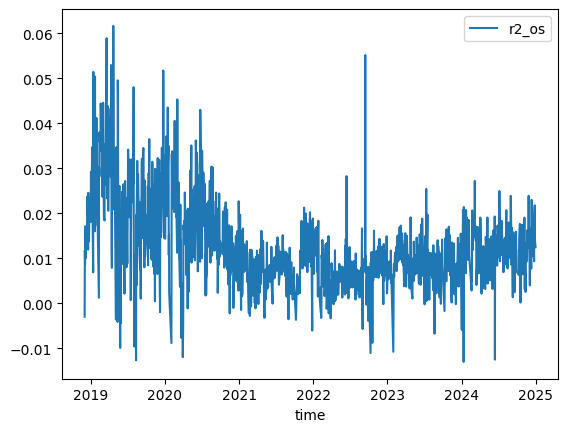

In [113]:
r2_by_minute.set_index('time').plot()

In [42]:
prediction2 = prediction[prediction['y_pred'].abs() > 3e-4 ]
prediction2

,datetime,y_true,y_pred,code
0,2018-12-03 09:02:00,-0.015221,0.000727,A
1,2018-12-03 09:03:00,-0.000877,0.000998,A
4,2018-12-03 09:06:00,0.000873,-0.000483,A
6,2018-12-03 09:08:00,0.003902,-0.000311,A
16,2018-12-03 09:18:00,0.000431,0.000321,A
...,...,...,...,...
11308489,2022-03-08 13:56:00,0.000000,-0.000305,ZN
11308541,2022-03-08 14:48:00,0.010299,0.000460,ZN
11308542,2022-03-08 14:49:00,0.004498,-0.000342,ZN
11308544,2022-03-08 14:51:00,0.008210,0.000349,ZN


In [74]:
df = prediction.copy()
# df = prediction.copy()
df['same_sign'] = (
    ((df['y_true'] > 0) & (df['y_pred'] > 0)) |
    ((df['y_true'] < 0) & (df['y_pred'] < 0))
).astype(int)

# 2) 方向相同的比例
ratio_same_sign = df['same_sign'].mean()

print(f"y_true 与 y_pred 方向相同的比例: {ratio_same_sign:.4f}")

y_true 与 y_pred 方向相同的比例: 0.4196


In [75]:
df = prediction.copy()
df['same_sign'] = (
    ((df['y_true'] > 0) & (df['y_pred'] < 0)) |
    ((df['y_true'] < 0) & (df['y_pred'] > 0))
).astype(int)

# 2) 方向相同的比例
ratio_same_sign = df['same_sign'].mean()

print(f"y_true 与 y_pred 方向相同的比例: {ratio_same_sign:.4f}")

y_true 与 y_pred 方向相同的比例: 0.3370


In [27]:
def cross_sectional_minute_return(group):
    if group.empty:
        return 0.0

    # 找到预测值最高的股票对应的索引（long 对应）
    idx_max = group["y_pred"].idxmax()
    # 找到预测值最低的股票对应的索引（short 对应）
    idx_min = group["y_pred"].idxmin()

    # 取出对应股票的真实收益
    long_ret = group.loc[idx_max, "y_true"]
    short_ret = group.loc[idx_min, "y_true"]

    # 返回多头与空头的收益差（多头 - 空头）
    return long_ret - short_ret - 3e-4

df = prediction2.copy()
minute_returns = df.groupby("datetime").apply(cross_sectional_minute_return)
minute_returns

datetime
2018-12-03 09:02:00    0.004506
2018-12-03 09:03:00   -0.002789
2018-12-03 09:04:00   -0.008742
2018-12-03 09:05:00    0.002735
2018-12-03 09:06:00    0.004843
                         ...   
2024-10-30 14:32:00   -0.000300
2024-10-30 14:35:00   -0.000300
2024-10-30 14:38:00   -0.000300
2024-10-30 14:39:00   -0.000300
2024-10-30 14:48:00   -0.000300
Length: 86075, dtype: float64

### 投资组合

#### zero-cost spread portfolio(before cost)

In [55]:
import pandas as pd
prediction = pd.read_parquet('/mnt/all_rolling_predictions_CAR_1min.parquet', engine = 'fastparquet')
# prediction = pd.read_csv('/mnt/all_rolling_predictions_LASSO_5min.csv')

codes = ['A', 'AG', 'AL', 'AP', 'AU', 'B', 'BU', 'C', 'CF', 'CS', 'CU', 'CY',
       'FB', 'FG', 'HC', 'J', 'JD', 'L', 'M', 'MA', 'NI', 'OI', 'PB', 'PP',
       'RB', 'RM', 'RU', 'SF', 'SM', 'SN', 'SR', 'TA', 'V', 'Y', 'ZC', 'ZN']

prediction['code'] = (
    prediction.groupby('datetime').cumcount()          
      .map(dict(enumerate(codes)))
)
prediction

,datetime,y_true,y_pred,code
0,2018-04-02 09:03:00,-0.001013,0.000208,A
1,2018-04-02 09:04:00,-0.001691,0.000441,A
2,2018-04-02 09:05:00,0.002029,0.000364,A
3,2018-04-02 09:06:00,-0.001014,-0.000125,A
4,2018-04-02 09:07:00,-0.001354,-0.000059,A
...,...,...,...,...
12732403,2024-12-30 14:56:00,0.000000,-0.000008,ZN
12732404,2024-12-30 14:57:00,0.000198,-0.000004,ZN
12732405,2024-12-30 14:58:00,0.000000,-0.000045,ZN
12732406,2024-12-30 14:59:00,-0.000198,-0.000022,ZN


In [56]:
import numpy as np
true_sign  = np.sign(prediction["y_true"])
pred_sign  = np.sign(prediction["y_pred"])
same_dir   = true_sign == pred_sign
total_obs           = len(prediction)
same_cnt            = same_dir.sum()         
opposite_cnt        = total_obs - same_cnt
same_ratio          = same_cnt     / total_obs
opposite_ratio      = opposite_cnt / total_obs

print(f"方向相同：{same_cnt:,} 行，占 {same_ratio:.2%}")
print(f"方向相反：{opposite_cnt:,} 行，占 {opposite_ratio:.2%}")

方向相同：5,383,685 行，占 42.28%
方向相反：7,348,723 行，占 57.72%


In [58]:
# strate1
import numpy as np
import pandas as pd
def minute_pnl(filtered: pd.DataFrame,
               ret_col: str  = 'y_true',
               pred_col: str = 'y_pred',
               time_col: str = 'datetime') -> pd.DataFrame:

    df = filtered.copy()
    df[time_col] = pd.to_datetime(df[time_col])

    sign = np.sign(df[pred_col])
    df['phi'] = sign * df[ret_col]
    minute_phi   = df.groupby(time_col)['phi'].mean().rename('phi_mean')
    minute_long  = df.loc[sign>0 ].groupby(time_col)[ret_col].mean().rename('long_ret')
    minute_short = df.loc[sign<0 ].groupby(time_col)[ret_col].mean().rename('short_ret')
    minute_df = pd.concat([minute_phi, minute_long, minute_short], axis=1).fillna(0)
    return minute_df

minute_ret = minute_pnl(prediction)
minute_ret

,phi_mean,long_ret,short_ret
datetime,,,
2018-04-02 09:03:00,0.002205,-0.000023,-0.003797
2018-04-02 09:04:00,0.000595,-0.001290,-0.002952
2018-04-02 09:05:00,-0.000288,0.001882,0.002714
2018-04-02 09:06:00,-0.004006,-0.010514,-0.001817
2018-04-02 09:07:00,0.000353,0.000231,-0.000669
...,...,...,...
2024-12-30 14:56:00,-0.000036,-0.000140,-0.000219
2024-12-30 14:57:00,0.000070,0.000157,-0.000015
2024-12-30 14:58:00,0.000050,0.000080,-0.000025


In [62]:
(minute_ret['phi_mean'] > 0).mean()

0.6506624669897477

In [59]:
minute_ret.mean()

phi_mean     0.000061
long_ret     0.000064
short_ret   -0.000065
dtype: float64

In [60]:
def monthly_excess_and_sharpe(minute_ret: pd.DataFrame,
                              rf_annual: float = 0.02,
                              periods_per_year: int = 12):
    """
    minute_ret: DataFrame of arithmetic minute returns, columns 1…10
    """
    monthly_log = np.log1p(minute_ret).resample("M").sum()
    monthly_arith = np.expm1(monthly_log)          

    rf_monthly = rf_annual / periods_per_year
    excess = monthly_arith.sub(rf_monthly)         # broadcast to all columns
    sharpe = (excess.mean() /
              excess.std(ddof=1)) * np.sqrt(periods_per_year)
    return excess, sharpe

monthly_excess, sharpe_ann = monthly_excess_and_sharpe(minute_ret, rf_annual=0.02)
print("\n年化 Sharpe:")
print(sharpe_ann.round(3))


年化 Sharpe:
phi_mean      7.300
long_ret      7.316
short_ret   -10.397
dtype: float64


In [50]:
import pandas as pd
import numpy as np

def build_minute_decile_returns(df: pd.DataFrame) -> pd.DataFrame:
    if not np.issubdtype(df['datetime'].dtype, np.datetime64):
        df = df.copy()                        
        df['datetime'] = pd.to_datetime(df['datetime'])
        
    decile = (
        df.groupby('datetime', group_keys=False)['y_pred']
          .rank(method='first', pct=True)
          .mul(10)
          .apply(np.ceil)
          .astype('uint8')
    )
    df = df.assign(decile=decile)
    decile_ret = (
        df.groupby(['datetime', 'decile'])['y_true']
          .mean()
          .unstack('decile')
          .reindex(columns=range(1, 11))       
    )

    decile_ret['10_minus_1'] = decile_ret[10] - decile_ret[1]

    # optional: use string labels for columns
    decile_ret.columns = [str(c) if isinstance(c, int) else c
                          for c in decile_ret.columns]

    return decile_ret

minute_ret = build_minute_decile_returns(prediction)
minute_ret

,1,2,3,4,5,6,7,8,9,10,10_minus_1
datetime,,,,,,,,,,,
2018-05-02 09:01:00,0.004184,-0.001404,0.000234,-0.000472,0.000020,-0.001461,-0.001046,-0.002228,-0.004145,-0.003154,-0.007338
2018-05-02 09:02:00,-0.008351,0.002994,0.000915,0.000825,0.000488,0.000197,-0.001579,0.000704,0.002795,0.001387,0.009739
2018-05-02 09:03:00,-0.005021,-0.000617,-0.003856,0.000250,-0.000350,0.000228,-0.000672,0.000009,0.000880,-0.000916,0.004105
2018-05-02 09:04:00,0.007443,-0.001597,0.001190,-0.000301,0.000722,0.000053,-0.000355,0.000870,0.002432,0.007541,0.000098
2018-05-02 09:05:00,0.000549,0.004258,0.000267,0.003393,0.006018,-0.000623,-0.000155,-0.000616,0.000451,0.000050,-0.000499
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 14:56:00,-0.000154,-0.000279,0.000309,0.000126,-0.000285,0.000180,-0.000027,0.000214,0.000109,0.000267,0.000421
2024-12-30 14:57:00,0.000124,-0.000066,-0.000101,-0.000246,-0.000021,-0.000175,0.000514,-0.000414,0.000201,0.000594,0.000470
2024-12-30 14:58:00,-0.000721,-0.000169,0.000037,-0.000371,0.000053,0.000303,-0.000054,-0.000109,0.000388,0.000498,0.001219


In [51]:
def monthly_excess_and_sharpe(minute_ret: pd.DataFrame,
                              rf_annual: float = 0.02,
                              periods_per_year: int = 12):
    """
    minute_ret: DataFrame of arithmetic minute returns, columns 1…10
    """
    # 1) compound each leg correctly: sum logs, then exp
    monthly_log = np.log1p(minute_ret).resample("M").sum()
    monthly_arith = np.expm1(monthly_log)          # back to arithmetic

    # 2) build the long–short AFTER monthly aggregation
    monthly_arith["10_minus_1"] = monthly_arith['10'] - monthly_arith['1']

    # 3) excess returns & Sharpe
    rf_monthly = rf_annual / periods_per_year
    excess = monthly_arith.sub(rf_monthly)         # broadcast to all columns
    sharpe = (excess.mean() /
              excess.std(ddof=1)) * np.sqrt(periods_per_year)
    return excess, sharpe



monthly_excess, sharpe_ann = monthly_excess_and_sharpe(minute_ret, rf_annual=0.02)

print("年化 Sharpe:")
print(sharpe_ann.round(2))

年化 Sharpe:
1            -11.50
2            -11.01
3             -8.88
4             -6.97
5             -2.60
6              2.38
7              5.27
8              6.67
9              6.85
10             4.06
10_minus_1     4.96
dtype: float64


In [52]:
from scipy import stats
data = minute_ret['10_minus_1'].dropna().values

mean_val = np.mean(data)
t_stat, p_val = stats.ttest_1samp(data, popmean=0)

print(f"样本均值 = {mean_val:.6f}")
print(f"t 统计量 = {t_stat:.4f}")
print(f"p-value = {p_val:.4f}")

样本均值 = 0.000398
t 统计量 = 150.7071
p-value = 0.0000


#### zero-cost spread portfolio(after cost)

In [66]:
import pandas as pd
# pre2 = pd.read_csv('all_rolling_predictions_lasso_1min.csv')
pre2 = pd.read_parquet('/mnt/all_rolling_predictions_gar_1min.parquet', engine = 'fastparquet')
# pre2 = pd.read_csv('/mnt/all_rolling_predictions_lasso_1min.csv')
codes = ['A', 'AG', 'AL', 'AP', 'AU', 'B', 'BU', 'C', 'CF', 'CS', 'CU', 'CY',
       'FB', 'FG', 'HC', 'J', 'JD', 'L', 'M', 'MA', 'NI', 'OI', 'PB', 'PP',
       'RB', 'RM', 'RU', 'SF', 'SM', 'SN', 'SR', 'TA', 'V', 'Y', 'ZC', 'ZN']

pre2['code'] = (
    pre2.groupby('datetime').cumcount()          
      .map(dict(enumerate(codes)))
)
pre2

,datetime,y_true,y_pred,code
0,2018-04-02 09:02:00,-0.001013,0.000070,A
1,2018-04-02 09:03:00,-0.001691,0.000230,A
2,2018-04-02 09:04:00,0.002029,0.000245,A
3,2018-04-02 09:05:00,-0.001014,-0.000175,A
4,2018-04-02 09:06:00,-0.001354,0.000030,A
...,...,...,...,...
12732403,2024-12-30 14:55:00,0.000000,-0.000009,ZN
12732404,2024-12-30 14:56:00,0.000198,-0.000037,ZN
12732405,2024-12-30 14:57:00,0.000000,-0.000036,ZN
12732406,2024-12-30 14:58:00,-0.000198,-0.000014,ZN


In [67]:
pivot_spread = pd.read_parquet('./data/pivot_spread.parquet', engine = 'fastparquet')
pre2['datetime'] = pd.to_datetime(pre2['datetime'])
pivot_spread.index = pd.to_datetime(pivot_spread.index)
spread_long = (
    pivot_spread
    .stack()                               
    .rename('spread')                     
    .reset_index()                        
)                                         

spread_long.columns = ['datetime', 'code', 'spread']

df_w = pre2.merge(spread_long,
                on=['datetime', 'code'],
                how='left',
                validate='many_to_one')     

filtered = df_w.loc[abs(df_w['y_pred']) > df_w['spread']]
filtered

,datetime,y_true,y_pred,code,spread
523,2018-04-04 10:34:00,-0.000993,-0.000424,A,0.000331
544,2018-04-04 10:55:00,-0.001309,-0.000372,A,0.000327
670,2018-04-09 09:03:00,-0.006960,0.000639,A,0.000315
671,2018-04-09 09:04:00,-0.005092,0.000941,A,0.000317
672,2018-04-09 09:05:00,-0.002876,0.000847,A,0.000319
...,...,...,...,...,...
12727470,2024-11-28 14:28:00,-0.001390,0.000243,ZN,0.000198
12727482,2024-11-28 14:40:00,0.001197,0.000359,ZN,0.000200
12727494,2024-11-28 14:52:00,0.002801,0.000359,ZN,0.000200
12727517,2024-11-29 09:17:00,-0.000202,0.000202,ZN,0.000201


In [49]:
# strate1
import numpy as np
import pandas as pd
def minute_pnl(filtered: pd.DataFrame,
               ret_col: str  = 'y_true',
               pred_col: str = 'y_pred',
               cost_col: str = 'spread',
               time_col: str = 'datetime') -> pd.DataFrame:

    df = filtered.copy()
    df[time_col] = pd.to_datetime(df[time_col])

    sign = np.sign(df[pred_col])
    df['phi'] = sign * df[ret_col] - df[cost_col]
    minute_phi   = df.groupby(time_col)['phi'].mean().rename('phi_mean')
    minute_long  = df.loc[sign>0 ].groupby(time_col)[ret_col].mean().rename('long_ret')
    minute_short = df.loc[sign<0 ].groupby(time_col)[ret_col].mean().rename('short_ret')
    minute_df = pd.concat([minute_phi, minute_long, minute_short], axis=1).fillna(0)
    return minute_df

minute_ret = minute_pnl(filtered)
minute_ret

,phi_mean,long_ret,short_ret
datetime,,,
2018-12-03 09:10:00,0.000941,-0.003201,-0.003404
2018-12-03 09:15:00,-0.000884,-0.002454,-0.000500
2018-12-03 09:20:00,0.001812,0.000768,-0.002717
2018-12-03 09:25:00,-0.001713,-0.001447,0.000000
2018-12-03 09:30:00,0.001760,0.001880,0.000000
...,...,...,...
2024-12-30 14:25:00,-0.000558,0.000000,0.000479
2024-12-30 14:30:00,-0.000259,-0.000226,0.000000
2024-12-30 14:40:00,-0.000273,-0.000189,0.000000


In [50]:
minute_ret.mean()

phi_mean    -0.000026
long_ret     0.000053
short_ret   -0.000088
dtype: float64

In [51]:
def monthly_excess_and_sharpe(minute_ret: pd.DataFrame,
                              rf_annual: float = 0.02,
                              periods_per_year: int = 12):
    """
    minute_ret: DataFrame of arithmetic minute returns, columns 1…10
    """
    monthly_log = np.log1p(minute_ret).resample("M").sum()
    monthly_arith = np.expm1(monthly_log)          

    rf_monthly = rf_annual / periods_per_year
    excess = monthly_arith.sub(rf_monthly)         # broadcast to all columns
    sharpe = (excess.mean() /
              excess.std(ddof=1)) * np.sqrt(periods_per_year)
    return excess, sharpe

monthly_excess, sharpe_ann = monthly_excess_and_sharpe(minute_ret, rf_annual=0.02)
print("\n年化 Sharpe:")
print(sharpe_ann.round(3))


年化 Sharpe:
phi_mean    -0.891
long_ret     2.030
short_ret   -2.502
dtype: float64


In [57]:
# strate2
import numpy as np
def assign_tercile(group: pd.DataFrame) -> pd.DataFrame:
    group = group.dropna(subset=['y_pred'])
    if len(group) < 3:
        group['tercile'] = np.nan
        return group
    group['tercile'] = pd.qcut(group['y_pred'], q=3, labels=False) + 1
    return group

def construct_long_short_after_spread(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df.groupby('datetime', group_keys=False).apply(assign_tercile)
    mean_ret = (
        df.groupby(['datetime', 'tercile'])['y_true']
          .mean()
          .unstack()
          .rename(columns={1:'tercile_1', 2:'tercile_2', 3:'tercile_3'})
          .fillna(0)
    )

    mean_spread = (
        df.groupby(['datetime', 'tercile'])['spread']
          .mean()
          .unstack()
          .rename(columns={1:'spread_1', 2:'spread_2', 3:'spread_3'})
          .fillna(0)
    )

    out = mean_ret.join(mean_spread)

    out['tercile_1_net'] = out['tercile_1'] - out['spread_1']
    out['tercile_2_net'] = out['tercile_2'] - out['spread_2']
    out['tercile_3_net'] = out['tercile_3'] - out['spread_3']

    
    out['LS']     = out['tercile_3']     - out['tercile_1']
    # 扣减两端交易成本：spread_1 + spread_3
    out['LS_net'] = out['LS'] - (out['spread_1'] + out['spread_3'])
    return out

minute_ret = construct_long_short_after_spread(filtered)
minute_ret

tercile,tercile_1,tercile_2,tercile_3,spread_1,spread_2,spread_3,tercile_1_net,tercile_2_net,tercile_3_net,LS,LS_net
datetime,,,,,,,,,,,
2018-04-02 09:03:00,-0.002848,0.001227,-0.000614,0.000737,0.000171,0.000701,-3.584358e-03,0.001056,-0.001315,0.002233,0.000796
2018-04-02 09:04:00,-0.004874,-0.000190,-0.000982,0.000523,0.000096,0.000588,-5.397260e-03,-0.000286,-0.001570,0.003892,0.002781
2018-04-02 09:05:00,0.000195,0.000440,0.002723,0.000223,0.000096,0.000716,-2.817554e-05,0.000344,0.002007,0.002528,0.001589
2018-04-02 09:06:00,-0.002535,-0.000900,-0.000933,0.000473,0.000180,0.000141,-3.008716e-03,-0.001080,-0.001074,0.001603,0.000988
2018-04-02 09:07:00,-0.000033,-0.001777,0.007108,0.000402,0.000413,0.001727,-4.342923e-04,-0.002190,0.005382,0.007141,0.005013
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 09:09:00,-0.000577,0.000556,-0.005826,0.000185,0.000111,0.000143,-7.617642e-04,0.000444,-0.005968,-0.005249,-0.005576
2024-12-30 09:10:00,-0.000724,-0.000290,0.000997,0.000081,0.000032,0.000142,-8.049553e-04,-0.000322,0.000855,0.001722,0.001499
2024-12-30 09:13:00,-0.000024,0.000445,-0.000129,0.000091,0.000111,0.000032,-1.149406e-04,0.000334,-0.000161,-0.000105,-0.000228


In [58]:
minute_ret.describe()

tercile,tercile_1,tercile_2,tercile_3,spread_1,spread_2,spread_3,tercile_1_net,tercile_2_net,tercile_3_net,LS,LS_net
count,69334.000000,69334.000000,69334.000000,69334.000000,69334.000000,69334.000000,69334.000000,69334.000000,69334.000000,69334.000000,69334.000000
mean,-0.000164,0.000016,0.000185,0.000192,0.000132,0.000202,-0.000356,-0.000116,-0.000016,0.000349,-0.000045
std,0.001594,0.001317,0.001756,0.000169,0.000072,0.000192,0.001612,0.001318,0.001749,0.002128,0.002126
min,-0.045325,-0.018262,-0.041385,0.000030,0.000027,0.000027,-0.045512,-0.018501,-0.044906,-0.042455,-0.046115
25%,-0.000818,-0.000621,-0.000536,0.000118,0.000077,0.000118,-0.001008,-0.000748,-0.000711,-0.000611,-0.000973
50%,-0.000079,0.000000,0.000063,0.000162,0.000124,0.000166,-0.000257,-0.000130,-0.000062,0.000351,-0.000004
75%,0.000500,0.000647,0.000871,0.000226,0.000168,0.000235,0.000338,0.000518,0.000690,0.001337,0.000959
max,0.036884,0.025962,0.042742,0.004425,0.002646,0.005556,0.034098,0.025774,0.038557,0.045452,0.045112


In [59]:
from scipy import stats
data = minute_ret['LS_net'].dropna().values

mean_val = np.mean(data)
t_stat, p_val = stats.ttest_1samp(data, popmean=0)

print(f"样本均值 = {mean_val:.6f}")
print(f"t 统计量 = {t_stat:.4f}")
print(f"p-value = {p_val:.4f}")

样本均值 = -0.000045
t 统计量 = -5.5705
p-value = 0.0000


In [9]:
def monthly_excess_and_sharpe(minute_ret: pd.DataFrame,
                              rf_annual: float = 0.02,
                              periods_per_year: int = 12):
    """
    minute_ret: DataFrame of arithmetic minute returns, columns 1…10
    """
    monthly_log = np.log1p(minute_ret).resample("M").sum()
    monthly_arith = np.expm1(monthly_log)          

    rf_monthly = rf_annual / periods_per_year
    excess = monthly_arith.sub(rf_monthly)         # broadcast to all columns
    sharpe = (excess.mean() /
              excess.std(ddof=1)) * np.sqrt(periods_per_year)
    return excess, sharpe

# monthly_excess, sharpe_ann = monthly_excess_and_sharpe(minute_ret, rf_annual=0.02)
# print("\n年化 Sharpe:")
# print(sharpe_ann.round(3))

#### Variance Weighted Portfolio

In [2]:
import numpy as np
import pandas as pd
import datetime
com_1m_bar = pd.read_parquet('/mnt/data/com_1m_bar.parquet', engine = 'fastparquet')
com_1m_bar = com_1m_bar.reset_index()
invalid_code = ['BC', 'CJ', 'EB', 'EG', 'FU', 'I', 'JM', 'LG', 'LH', 'LU', 'NR', 'P',
               'PF', 'PG', 'PK', 'PX', 'RR', 'SA', 'SC', 'SH', 'SP', 'SS', 'UR', 'WR', 
               'PM', 'BB', 'RI', 'JR', 'LR', 'RS', 'WH']
com_1m_bar = com_1m_bar[~com_1m_bar['underlying_symbol'].isin(invalid_code)]
com_1m_bar = com_1m_bar[
    (com_1m_bar['datetime'].dt.time >= datetime.time(9, 0)) & 
    (com_1m_bar['datetime'].dt.time <= datetime.time(15, 0))
]
com_1m_bar = com_1m_bar[com_1m_bar.trading_date >= '2018-01-01']

com_1m_bar["log_close"] = np.log(com_1m_bar["close"])
com_1m_bar["log_ret"]   = com_1m_bar.groupby("underlying_symbol")["log_close"].diff()
pivot_ret = com_1m_bar.pivot(index="datetime", columns="underlying_symbol", values="log_ret").iloc[1:,:]

df = pivot_ret.copy()
df.reset_index(inplace = True)
df['date'] = df['datetime'].dt.date
df_cleaned = df.groupby('date', group_keys=False).apply(lambda group: group.iloc[1:-1])
df_cleaned = df_cleaned.drop(columns=['date'])
df_cleaned.set_index('datetime', inplace = True)
df_cleaned

underlying_symbol,A,AG,AL,AP,AU,B,BU,C,CF,CS,...,RU,SF,SM,SN,SR,TA,V,Y,ZC,ZN
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-02 09:03:00,-0.000356,-0.001252,-0.003053,-0.000855,-0.001068,0.000000,0.000000,0.000454,-0.000274,0.000000,...,-0.000390,0.002168,-0.001415,-0.000880,0.000557,-0.002322,-0.002596,0.001566,0.019131,0.000294
2018-01-02 09:04:00,0.001066,0.000626,0.003815,0.000855,0.000458,0.000000,0.002334,0.000454,0.001095,0.000722,...,-0.001172,0.003963,0.000354,-0.000196,0.000000,0.000000,0.003460,0.002345,-0.007782,-0.001768
2018-01-02 09:05:00,0.000710,0.000000,0.002282,-0.000684,-0.000153,0.000000,0.000000,0.001815,0.000000,0.000721,...,0.001367,-0.002160,0.001061,0.004979,0.000742,0.000929,0.001726,0.003896,-0.001738,0.003533
2018-01-02 09:06:00,0.002836,-0.000209,-0.001140,0.000000,0.000000,0.000000,0.000777,0.000906,-0.000274,0.000360,...,0.000585,-0.000721,-0.005318,0.003597,-0.000371,0.001856,0.003442,0.013900,-0.007857,0.001468
2018-01-02 09:07:00,0.000354,-0.000209,0.000380,-0.000171,0.000153,0.000000,-0.001554,0.000000,0.000000,0.000000,...,-0.000390,0.000721,0.001776,-0.002623,0.000742,0.000000,-0.001720,0.003827,0.000000,0.002930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 14:55:00,0.000000,0.000266,0.000000,0.000283,0.000161,0.000301,0.000000,0.000000,0.000370,0.000388,...,-0.000281,0.000000,0.000000,-0.000286,0.000000,-0.000409,-0.000378,0.000778,0.000000,0.000394
2024-12-31 14:56:00,0.000254,-0.000133,0.000252,0.001553,0.000193,0.000000,-0.000270,0.000000,0.000000,-0.000388,...,-0.000281,-0.000965,0.000000,0.000041,0.000336,-0.000818,0.000000,-0.000259,0.000000,-0.000591
2024-12-31 14:57:00,0.000000,-0.000133,-0.000252,0.000423,0.000129,-0.000601,0.000270,0.000000,0.000000,0.000000,...,-0.000561,0.000643,0.000329,0.000245,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000


In [68]:
import numpy as np
import pandas as pd

def variance_weighted_portfolio_with_cost(
    filtered: pd.DataFrame,     
    pivot_ret: pd.DataFrame,    
    window_for_sd: int = 30
):

    rolling_std = (
        pivot_ret
        .rolling(window_for_sd, min_periods=window_for_sd)
        .std()
        .fillna(method='bfill')
        .fillna(0)
    )
    std_long = (
        rolling_std.stack()
                   .rename('std')
                   .reset_index()            
    )
    std_long.columns = ['datetime','code','std']

    df = (
        filtered
        .merge(std_long, on=['datetime', 'code'], how='left')
        .assign(std=lambda x: x['std'].replace(0, np.nan))   # 防止除零
    )
    df['numerator'] = df['y_pred'].abs() / df['std']**2

    denom = (
        df.groupby('datetime')['numerator']
          .transform('sum')
          .replace(0, np.nan)
    )
    df['weight'] = df['numerator'] / denom

    df['signed_ret'] = np.sign(df['y_pred']) * df['y_true']
    df['cost_i'] = df.apply(
        lambda row: row['spread'], axis=1
    )
    minute_ret = (
        (df['weight'] * (df['signed_ret'] - df['cost_i']))
        .groupby(df['datetime'])
        .sum()
        .fillna(0)
        .sort_index()
    )

    daily_ret = minute_ret.groupby(minute_ret.index.date).sum()

    stats = {
        'signal_ratio'      : len(filtered) / (len(df) if len(df) else 1),
        'trade_min_ratio'   : (df.groupby('datetime')['weight'].sum()
                                 .gt(0).mean()),
        'avg_instr_per_min' : df.groupby('datetime')['code'].nunique().mean()
    }

    return minute_ret, daily_ret, stats

minute_ret, daily_ret, stats = variance_weighted_portfolio_with_cost(
    filtered, df_cleaned, window_for_sd=30
)
minute_ret

datetime
2018-04-02 09:02:00    0.000599
2018-04-02 09:03:00    0.001247
2018-04-02 09:04:00    0.000811
2018-04-02 09:05:00    0.000650
2018-04-02 09:06:00   -0.000286
                         ...   
2024-12-30 11:14:00    0.000121
2024-12-30 11:16:00    0.001171
2024-12-30 13:31:00    0.000323
2024-12-30 13:57:00    0.000162
2024-12-30 14:25:00   -0.000281
Length: 218764, dtype: float64

In [69]:
minute_ret.mean()

4.034215146900898e-05

In [70]:
monthly_excess, sharpe_ann = monthly_excess_and_sharpe(minute_ret, rf_annual=0.02)

In [71]:
sharpe_ann

2.379813338787818

筛选交易活跃的品种

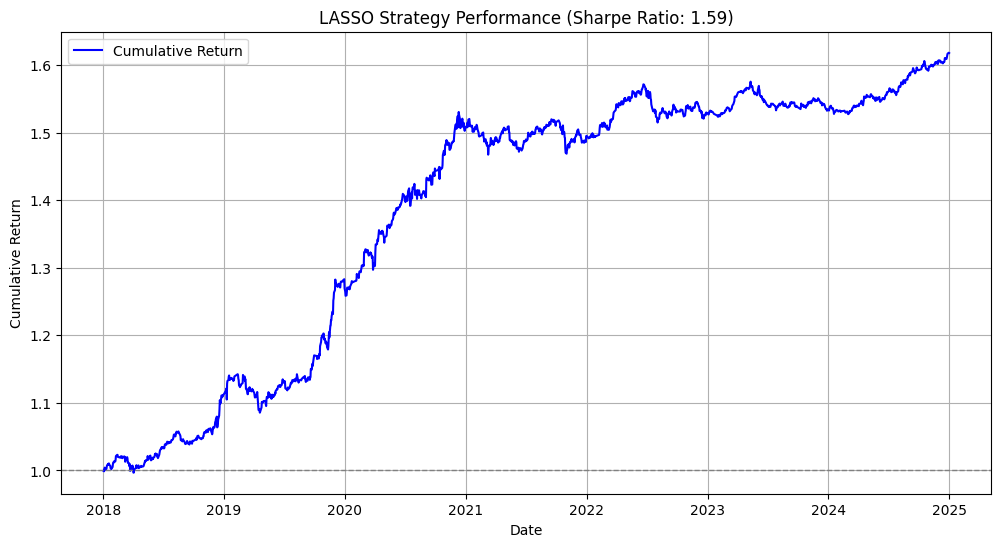

In [4]:
import matplotlib.pyplot as plot
mp.plot_results(daily_returns_df, sharpe_ratio)

In [6]:
daily_returns_df.to_csv('./data/ridgeret.csv')

In [5]:
pivot_ret = pivot_ret[['EB', 'NI', 'AP', 'PP', 'SN', 'PG', 'J', 'EG', 'LU', 'JM', 'SC', 'LH',
       'PK', 'JD', 'BC', 'HC', 'RB', 'P', 'PX', 'PF', 'SH', 'SR', 'I', 'RU',
       'SA', 'OI', 'CU', 'MA', 'AU', 'CJ']]
pred_lasso = pred_lasso[['EB', 'NI', 'AP', 'PP', 'SN', 'PG', 'J', 'EG', 'LU', 'JM', 'SC', 'LH',
       'PK', 'JD', 'BC', 'HC', 'RB', 'P', 'PX', 'PF', 'SH', 'SR', 'I', 'RU',
       'SA', 'OI', 'CU', 'MA', 'AU', 'CJ']]

NameError: name 'pivot_ret' is not defined

### AR(P)

In [15]:
import metrics as me
pred_ar, pivot_ret = me.rolling_ar_forecast_parallel(
                    com_1m_bar, date_str, 
                    window_size=30, p=3, n_jobs=-1)

compute_one_day_oos_r2(pred_ar, pivot_ret, baseline=0)

-0.18312357904729804

In [6]:
pred_lasso

underlying_symbol,A,AG,AL,AP,AU,B,BC,BU,C,CF,...,SM,SN,SP,SR,SS,TA,UR,V,Y,ZN
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-02 09:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02 09:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02 09:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02 09:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02 09:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-02 14:45:00,-0.000136,0.000226,NaN,-0.000251,0.000048,-0.001018,NaN,0.000099,0.000118,NaN,...,-0.000042,NaN,-0.000819,NaN,-0.000393,NaN,-0.002204,NaN,0.000233,0.000049
2024-01-02 14:48:00,-0.000689,-0.000140,NaN,-0.000077,0.000242,-0.001024,NaN,NaN,-0.000162,0.000010,...,0.000196,NaN,-0.000575,NaN,0.000449,-0.000719,-0.000100,NaN,-0.001121,NaN
2024-01-02 14:51:00,-0.000143,0.000152,NaN,0.000191,0.000084,0.000065,NaN,NaN,0.000598,-0.000264,...,NaN,0.000467,-0.000227,NaN,NaN,-0.000323,0.000144,NaN,0.000811,NaN


In [44]:
# 加入其他行业的lagged return会让预测变好吗？ 好了一点点但不多
existing_cols = [col for col in agri.tolist() if col in pred_lasso.columns]
pred_lasso = pred_lasso[existing_cols]
pred_lasso

underlying_symbol,AP,CJ,CS,JD
datetime,,,,
2020-01-02 09:11:00,NaN,NaN,NaN,NaN
2020-01-02 09:12:00,NaN,NaN,NaN,NaN
2020-01-02 09:13:00,NaN,NaN,NaN,NaN
2020-01-02 09:14:00,NaN,NaN,NaN,NaN
2020-01-02 09:15:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-01-02 14:55:00,-0.000050,0.000014,0.000036,-0.000163
2020-01-02 14:56:00,-0.000047,0.000007,0.000048,-0.000219
2020-01-02 14:57:00,-0.000022,0.000014,0.000036,-0.000220


In [4]:
mp.run_backtest(com_1m_bar, start_date='2022-01-01', end_date='2024-12-31')

KeyError: ['return']

In [8]:
# 存储每个品种的结果
oos_r2_dict = {}

for symbol in pivot_ret.columns:
    pivot = pivot_ret[[symbol]]
    pred = pred_lasso[[symbol]]
    oos_r2 = compute_one_day_oos_r2(pred, pivot, baseline=0)
    oos_r2_dict[symbol] = oos_r2

# 整理成 DataFrame 并排序
oos_r2_df = pd.DataFrame.from_dict(oos_r2_dict, orient='index', columns=['OOS_R2'])
oos_r2_df = oos_r2_df.sort_values(by='OOS_R2', ascending=False)
print(oos_r2_df)

      OOS_R2
JD  0.052198
EG  0.032538
RU  0.013186
AG  0.008660
PX  0.005710
CF  0.002643
RR -0.002627
AU -0.007166
CU -0.007497
C  -0.008216
BC -0.010805
NR -0.013250
CY -0.014486
PB -0.015701
TA -0.020486
SS -0.021881
NI -0.022710
MA -0.024024
ZN -0.026862
LU -0.028494
I  -0.030296
SR -0.035803
SH -0.036071
B  -0.037328
RB -0.038710
M  -0.041355
AL -0.043736
HC -0.043838
L  -0.046587
CJ -0.046654
FU -0.047821
OI -0.047885
FG -0.048233
SM -0.049325
SN -0.049638
V  -0.049778
Y  -0.050135
AP -0.051097
PF -0.057261
SA -0.057751
LH -0.058087
SF -0.065744
P  -0.067486
RM -0.067960
A  -0.068488
PP -0.081792
UR -0.085288
SC -0.091021
CS -0.091061
PG -0.093771
EB -0.096063
BU -0.098039
PK -0.100600
JM -0.142599
J  -0.276112
SP -0.554738


In [5]:
compute_one_day_oos_r2(pred_lasso, pivot_ret, baseline=0)

-0.026501019935179615

In [6]:
compute_oos_r2_by_sign(pred_lasso, pivot_ret, baseline=0)

{'R2_positive': -0.01687450381227995, 'R2_negative': -0.03917097060594266}

###  1、OOS test

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time

def compute_one_day_oos_r2(pred_lasso, pivot_ret, baseline=0):
    pivot_ret_shifted = pivot_ret.shift(-1)
    pred_lasso = pred_lasso.dropna()
    common_index = pred_lasso.index
    common_cols  = pred_lasso.columns
    pivot_ret_shifted.dropna(inplace = True)

    if isinstance(baseline, (int, float)):
        baseline_pred = pd.DataFrame(baseline, index=common_index, columns=common_cols)
    elif baseline == "random_walk":
        baseline_pred = pivot_ret.reindex(index=common_index, columns=common_cols, fill_value=0)
    elif baseline == "historical_mean":
        baseline_pred = pivot_ret.rolling(window=30, min_periods=30).mean()
    else:
        raise ValueError("baseline 必须为数值、'random_walk' 或 'historical_mean'")
    
    pivot_ret_shifted = pivot_ret_shifted.reindex(index=pred_lasso.index, columns=common_cols, fill_value=0)
    baseline_pred = baseline_pred.reindex(index=pred_lasso.index, columns=common_cols, fill_value=0)
    
    y_true = pivot_ret_shifted.values.flatten()
    y_pred = pred_lasso.values.flatten()
    y_base = baseline_pred.values.flatten()
    
    if len(y_true) == 0:
        return float('nan')

    rss_model = ((y_true - y_pred) ** 2).sum()
    rss_naive = ((y_true - y_base) ** 2).sum()
    
    if rss_naive == 0:
        return float('nan')
    
    r2 = 1 - rss_model / rss_naive
    return r2


def compute_oos_r2_by_sign(pred_lasso, pivot_ret, baseline="historical_mean"):
    """
    分别计算预测为正 / 预测为负的 OOS R²
    """
    pivot_ret_shifted = pivot_ret.shift(-1)
    pred_lasso = pred_lasso.dropna()
    common_index = pred_lasso.index
    common_cols  = pred_lasso.columns
    pivot_ret_shifted.dropna(inplace=True)

    if isinstance(baseline, (int, float)):
        baseline_pred = pd.DataFrame(baseline, index=common_index, columns=common_cols)
    elif baseline == "random_walk":
        baseline_pred = pivot_ret.reindex(index=common_index, columns=common_cols, fill_value=0)
    elif baseline == "historical_mean":
        baseline_pred = pivot_ret.rolling(window=30, min_periods=30).mean()
    else:
        raise ValueError("baseline 必须为数值、'random_walk' 或 'historical_mean'")

    # 对齐所有数据
    pivot_ret_shifted = pivot_ret_shifted.reindex(index=pred_lasso.index, columns=common_cols, fill_value=0)
    baseline_pred = baseline_pred.reindex(index=pred_lasso.index, columns=common_cols, fill_value=0)

    # 构建掩码
    sign_mask_positive = (pred_lasso > 0)
    sign_mask_negative = (pred_lasso < 0)

    # 展平数据
    y_true = pivot_ret_shifted.values.flatten()
    y_pred = pred_lasso.values.flatten()
    y_base = baseline_pred.values.flatten()
    mask_pos = sign_mask_positive.values.flatten()
    mask_neg = sign_mask_negative.values.flatten()

    # 正预测子集
    if mask_pos.sum() > 0:
        rss_model_pos = ((y_true[mask_pos] - y_pred[mask_pos]) ** 2).sum()
        rss_base_pos = ((y_true[mask_pos] - y_base[mask_pos]) ** 2).sum()
        r2_pos = 1 - rss_model_pos / rss_base_pos if rss_base_pos != 0 else np.nan
    else:
        r2_pos = np.nan

    # 负预测子集
    if mask_neg.sum() > 0:
        rss_model_neg = ((y_true[mask_neg] - y_pred[mask_neg]) ** 2).sum()
        rss_base_neg = ((y_true[mask_neg] - y_base[mask_neg]) ** 2).sum()
        r2_neg = 1 - rss_model_neg / rss_base_neg if rss_base_neg != 0 else np.nan
    else:
        r2_neg = np.nan

    return {
        "R2_positive": r2_pos,
        "R2_negative": r2_neg
    }

In [14]:
daily_r2_df.to_csv('./data/r2-2020.csv')

In [22]:
r2_2024 = pd.read_csv('/mnt/RA/Sparse_factors/data/r2-2024.csv')
r2_2024.dropna().describe()

,OOS_R2
count,242.000000
mean,0.033711
std,0.015029
min,-0.027746
25%,0.025218
50%,0.033121
75%,0.043089
max,0.100407


### MCS比较 naive 0

In [16]:
import pandas as pd
pred_lasso = pd.read_parquet('/mnt/RA/Sparse_factors/data/pred-2024.parquet', engine = 'fastparquet')
pred_lasso.drop(columns = 'date', axis = 1, inplace = True)
pred_lasso = pred_lasso[pred_lasso.index.time >= pd.to_datetime("10:50").time()]
pred_lasso

underlying_symbol,A,AG,AL,AP,AU,B,BC,BU,C,CF,...,SS,TA,UR,V,Y,ZN,RS,WR,BB,LG
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-02 10:51:00,-2.868010e-04,-0.000006,-1.990163e-04,-0.000066,0.000010,7.322257e-05,-0.000028,0.000495,-0.000153,0.000000,...,0.000038,-0.000255,-0.000126,8.750827e-05,-0.000235,-0.000165,NaN,NaN,NaN,NaN
2024-01-02 10:54:00,-2.769113e-04,0.000022,-1.658878e-04,-0.000040,0.000015,-4.425972e-05,-0.000022,0.000506,-0.000161,0.000011,...,0.000061,-0.000201,-0.000070,1.266586e-04,-0.000227,-0.000150,NaN,NaN,NaN,NaN
2024-01-02 10:57:00,-2.676809e-04,0.000011,-1.518990e-04,0.000004,0.000016,-1.027750e-04,-0.000016,0.000480,-0.000169,-0.000011,...,0.000047,-0.000195,-0.000067,9.696607e-05,-0.000283,-0.000137,NaN,NaN,NaN,NaN
2024-01-02 11:00:00,-1.447076e-04,0.000016,-1.855136e-04,-0.000004,0.000003,1.795567e-04,-0.000011,0.000397,-0.000117,0.000032,...,0.000082,-0.000195,0.000151,1.124056e-04,-0.000146,-0.000121,NaN,NaN,NaN,NaN
2024-01-02 11:03:00,-1.086367e-04,0.000038,-1.601959e-04,0.000031,0.000013,2.311555e-04,0.000005,0.000350,-0.000026,0.000032,...,0.000094,-0.000173,0.000369,1.276847e-04,0.000055,-0.000105,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 14:45:00,-1.940255e-12,0.000062,8.384689e-06,0.000066,0.000076,-7.010168e-05,0.000030,0.000117,0.000030,-0.000012,...,0.000065,0.000274,0.000098,5.041911e-05,-0.000121,0.000185,0.000068,-0.000358,0.001294,0.000201
2024-12-31 14:48:00,1.693767e-05,0.000067,9.701277e-13,0.000104,0.000099,-1.001452e-05,0.000036,0.000153,0.000045,-0.000025,...,0.000065,0.000287,0.000117,8.818347e-05,-0.000095,0.000171,0.000068,-0.000358,0.000000,0.000141
2024-12-31 14:51:00,1.694197e-05,0.000049,-2.515407e-05,0.000104,0.000099,1.940255e-12,0.000036,0.000153,0.000075,-0.000025,...,0.000052,0.000287,0.000078,7.561439e-05,-0.000104,0.000152,0.000068,-0.000485,0.000000,0.000081


In [17]:
pred_lasso = pred_lasso.drop(columns=['PM', 'JR', 'LR', 'RI', 'BB', 'RS', 'WR', 'WT', 'WH', 'FB', 'LG'], errors='ignore')
pred_lasso = pred_lasso.fillna(0)
pred_lasso.isna().sum()

underlying_symbol
A     0
AG    0
AL    0
AP    0
AU    0
B     0
BC    0
BU    0
C     0
CF    0
CJ    0
CS    0
CU    0
CY    0
EB    0
EG    0
FG    0
FU    0
HC    0
I     0
J     0
JD    0
JM    0
L     0
LH    0
LU    0
M     0
MA    0
NI    0
NR    0
OI    0
P     0
PB    0
PF    0
PG    0
PK    0
PP    0
PX    0
RB    0
RM    0
RR    0
RU    0
SA    0
SC    0
SF    0
SH    0
SM    0
SN    0
SP    0
SR    0
SS    0
TA    0
UR    0
V     0
Y     0
ZN    0
dtype: int64

In [18]:
pred_lasso

underlying_symbol,A,AG,AL,AP,AU,B,BC,BU,C,CF,...,SM,SN,SP,SR,SS,TA,UR,V,Y,ZN
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-02 10:51:00,-2.868010e-04,-0.000006,-1.990163e-04,-0.000066,0.000010,7.322257e-05,-0.000028,0.000495,-0.000153,0.000000,...,-0.000011,-0.000248,0.000850,-0.000049,0.000038,-0.000255,-0.000126,8.750827e-05,-0.000235,-0.000165
2024-01-02 10:54:00,-2.769113e-04,0.000022,-1.658878e-04,-0.000040,0.000015,-4.425972e-05,-0.000022,0.000506,-0.000161,0.000011,...,-0.000010,-0.000220,0.000809,-0.000024,0.000061,-0.000201,-0.000070,1.266586e-04,-0.000227,-0.000150
2024-01-02 10:57:00,-2.676809e-04,0.000011,-1.518990e-04,0.000004,0.000016,-1.027750e-04,-0.000016,0.000480,-0.000169,-0.000011,...,0.000020,-0.000242,0.000804,-0.000034,0.000047,-0.000195,-0.000067,9.696607e-05,-0.000283,-0.000137
2024-01-02 11:00:00,-1.447076e-04,0.000016,-1.855136e-04,-0.000004,0.000003,1.795567e-04,-0.000011,0.000397,-0.000117,0.000032,...,0.000029,-0.000214,0.000759,0.000046,0.000082,-0.000195,0.000151,1.124056e-04,-0.000146,-0.000121
2024-01-02 11:03:00,-1.086367e-04,0.000038,-1.601959e-04,0.000031,0.000013,2.311555e-04,0.000005,0.000350,-0.000026,0.000032,...,0.000039,-0.000177,0.000814,0.000074,0.000094,-0.000173,0.000369,1.276847e-04,0.000055,-0.000105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 14:45:00,-1.940255e-12,0.000062,8.384689e-06,0.000066,0.000076,-7.010168e-05,0.000030,0.000117,0.000030,-0.000012,...,0.000209,-0.000100,0.000022,0.000078,0.000065,0.000274,0.000098,5.041911e-05,-0.000121,0.000185
2024-12-31 14:48:00,1.693767e-05,0.000067,9.701277e-13,0.000104,0.000099,-1.001452e-05,0.000036,0.000153,0.000045,-0.000025,...,0.000198,-0.000072,0.000044,0.000129,0.000065,0.000287,0.000117,8.818347e-05,-0.000095,0.000171
2024-12-31 14:51:00,1.694197e-05,0.000049,-2.515407e-05,0.000104,0.000099,1.940255e-12,0.000036,0.000153,0.000075,-0.000025,...,0.000198,-0.000065,0.000044,0.000129,0.000052,0.000287,0.000078,7.561439e-05,-0.000104,0.000152


In [19]:
import numpy as np
pivot_close  = com_1m_bar.pivot(index='datetime', columns='underlying_symbol', values='close')
time_mask = (pivot_close.index.time >= pd.to_datetime("09:00").time()) & (pivot_close.index.time <= pd.to_datetime("15:00").time())
pivot_close = pivot_close.loc[time_mask]

# pivot_close = pivot_close.loc[:, pivot_close.nunique() > 1]
# invalid_cols = (pivot_close <= 0).any()
# pivot_close = pivot_close.loc[:, ~invalid_cols]
pivot_ret = np.log(pivot_close).diff()

time_mask = (pivot_ret.index.time >= pd.to_datetime("10:50").time()) & (pivot_ret.index.time <= pd.to_datetime("15:00").time())
pivot_ret = pivot_ret.loc[time_mask]
# pivot_ret = pivot_ret.dropna(axis=1)
pivot_ret

underlying_symbol,A,AG,AL,AP,AU,B,BC,BU,C,CF,...,SN,SP,SR,SS,TA,UR,V,Y,ZC,ZN
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-02 10:51:00,-0.000218,-0.000326,-0.000254,0.000460,-0.000162,0.002563,-0.000474,0.000000,0.000781,-0.000632,...,-0.000464,-0.000653,-0.000172,-0.000704,-0.000326,-0.001519,0.000612,-0.001098,0.0,-0.000243
2024-01-02 10:54:00,0.000000,0.000816,0.000762,0.000690,0.000162,-0.003334,0.000158,0.000825,-0.000391,0.000316,...,0.000557,-0.000327,0.000686,0.000704,0.001302,0.001519,0.001223,0.000000,0.0,0.000243
2024-01-02 10:57:00,0.000000,-0.000326,0.000254,0.001263,0.000040,-0.001800,0.000158,-0.000275,-0.000391,-0.000632,...,-0.000882,0.000653,-0.000343,-0.000352,0.000000,0.000000,-0.000764,-0.001925,0.0,0.000243
2024-01-02 11:00:00,0.001742,0.000652,0.000254,0.001147,0.000162,0.005901,0.000631,0.000000,0.000000,0.001264,...,0.000929,0.000000,0.001715,0.000704,0.000325,0.007060,-0.000918,0.001375,0.0,0.000971
2024-01-02 11:03:00,-0.000435,-0.000326,0.000507,-0.000573,-0.000404,-0.000512,-0.000316,0.000550,0.000391,0.000316,...,0.000186,0.000979,0.001027,0.000704,0.000325,0.003511,0.000612,0.001648,0.0,0.000728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 14:48:00,0.000254,0.000399,0.000251,0.000141,0.000645,0.000902,0.000305,0.001619,0.000897,-0.000370,...,0.000652,0.001001,0.000503,0.000389,0.000817,0.000585,0.001133,0.000779,0.0,-0.000197
2024-12-31 14:51:00,-0.000254,-0.000399,-0.000755,0.000141,-0.000032,-0.000301,-0.000305,0.000000,0.000448,-0.000370,...,0.000000,0.000000,0.000000,-0.000389,0.000000,-0.001171,-0.000566,-0.000519,0.0,0.000197
2024-12-31 14:54:00,0.000254,-0.001465,0.000000,-0.000706,-0.000064,-0.000301,-0.000152,-0.000539,-0.000897,0.000000,...,-0.000896,0.000333,-0.000839,-0.001557,-0.000409,0.000000,-0.000945,0.000260,0.0,0.000394


In [20]:
pivot_ret = pivot_ret.drop(columns=['LG'], errors='ignore')
pivot_ret.isna().sum()

underlying_symbol
A     0
AG    0
AL    0
AP    0
AU    0
B     0
BC    0
BU    0
C     0
CF    0
CJ    0
CS    0
CU    0
CY    0
EB    0
EG    0
FG    0
FU    0
HC    0
I     0
J     0
JD    0
JM    0
L     0
LH    0
LU    0
M     0
MA    0
NI    0
NR    0
OI    0
P     0
PB    0
PF    0
PG    0
PK    0
PP    0
PX    0
RB    0
RM    0
RR    0
RU    0
SA    0
SC    0
SF    0
SH    0
SM    0
SN    0
SP    0
SR    0
SS    0
TA    0
UR    0
V     0
Y     0
ZC    0
ZN    0
dtype: int64

In [21]:
pivot_ret

underlying_symbol,A,AG,AL,AP,AU,B,BC,BU,C,CF,...,SN,SP,SR,SS,TA,UR,V,Y,ZC,ZN
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-02 10:51:00,-0.000218,-0.000326,-0.000254,0.000460,-0.000162,0.002563,-0.000474,0.000000,0.000781,-0.000632,...,-0.000464,-0.000653,-0.000172,-0.000704,-0.000326,-0.001519,0.000612,-0.001098,0.0,-0.000243
2024-01-02 10:54:00,0.000000,0.000816,0.000762,0.000690,0.000162,-0.003334,0.000158,0.000825,-0.000391,0.000316,...,0.000557,-0.000327,0.000686,0.000704,0.001302,0.001519,0.001223,0.000000,0.0,0.000243
2024-01-02 10:57:00,0.000000,-0.000326,0.000254,0.001263,0.000040,-0.001800,0.000158,-0.000275,-0.000391,-0.000632,...,-0.000882,0.000653,-0.000343,-0.000352,0.000000,0.000000,-0.000764,-0.001925,0.0,0.000243
2024-01-02 11:00:00,0.001742,0.000652,0.000254,0.001147,0.000162,0.005901,0.000631,0.000000,0.000000,0.001264,...,0.000929,0.000000,0.001715,0.000704,0.000325,0.007060,-0.000918,0.001375,0.0,0.000971
2024-01-02 11:03:00,-0.000435,-0.000326,0.000507,-0.000573,-0.000404,-0.000512,-0.000316,0.000550,0.000391,0.000316,...,0.000186,0.000979,0.001027,0.000704,0.000325,0.003511,0.000612,0.001648,0.0,0.000728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 14:48:00,0.000254,0.000399,0.000251,0.000141,0.000645,0.000902,0.000305,0.001619,0.000897,-0.000370,...,0.000652,0.001001,0.000503,0.000389,0.000817,0.000585,0.001133,0.000779,0.0,-0.000197
2024-12-31 14:51:00,-0.000254,-0.000399,-0.000755,0.000141,-0.000032,-0.000301,-0.000305,0.000000,0.000448,-0.000370,...,0.000000,0.000000,0.000000,-0.000389,0.000000,-0.001171,-0.000566,-0.000519,0.0,0.000197
2024-12-31 14:54:00,0.000254,-0.001465,0.000000,-0.000706,-0.000064,-0.000301,-0.000152,-0.000539,-0.000897,0.000000,...,-0.000896,0.000333,-0.000839,-0.001557,-0.000409,0.000000,-0.000945,0.000260,0.0,0.000394


In [ ]:
import metrics as me
# pred_lasso = pred_lasso.dropna()
loss_df = me.build_loss_matrix(pred_lasso, pivot_ret, baseline="naive0", loss="squared")
mcs_result = me.run_mcs(loss_df, alpha=0.1)
print("Included models in the 90% MCS:", mcs_result.included)
print("MCS p-values:\n", mcs_result.pvalues)

### AR(P)

In [5]:
import metrics as me
import mypipeline as mp
daily_r2_results = {}

df = com_1m_bar.copy()
df['spread_est'] = 0
unique_dates = sorted(df['datetime'].dt.strftime('%Y-%m-%d').unique())


for date_str in unique_dates:
    print(f"Running strategy for {date_str}...")
    pred_ar, pivot_ret = me.rolling_ar_forecast_parallel(
                        com_1m_bar, date_str, 
                        window_size=30, p=3, n_jobs=-1)
    # 直接计算当天的 OOS R^2
    daily_r2 = compute_one_day_oos_r2(pred_ar, pivot_ret,baseline='historical_mean')
    print(f"{date_str} R方为 {daily_r2}...")
    daily_r2_results[date_str] = daily_r2

daily_r2_df = pd.DataFrame.from_dict(daily_r2_results, orient='index', columns=['OOS_R2'])
daily_r2_df.index.name = 'date'
print(daily_r2_df)

Running strategy for 2024-01-02...
信号触发比例: 12.50%
有交易的分钟占比     : 58.90%
平均每分钟交易的品种数量: 7.00
2024-01-02 R方为 0.03366579108164269...
Running strategy for 2024-01-03...
信号触发比例: 5.41%
有交易的分钟占比     : 58.90%
平均每分钟交易的品种数量: 3.03
2024-01-03 R方为 0.02638293109938361...
Running strategy for 2024-01-04...
信号触发比例: 10.81%
有交易的分钟占比     : 58.90%
平均每分钟交易的品种数量: 6.05
2024-01-04 R方为 0.01639092552957888...
Running strategy for 2024-01-05...
信号触发比例: 5.38%
有交易的分钟占比     : 58.90%
平均每分钟交易的品种数量: 3.01
2024-01-05 R方为 0.049017901509567974...
Running strategy for 2024-01-06...
信号触发比例: nan%
有交易的分钟占比     : nan%
平均每分钟交易的品种数量: nan
2024-01-06 R方为 nan...
Running strategy for 2024-01-08...
信号触发比例: 8.93%
有交易的分钟占比     : 58.90%
平均每分钟交易的品种数量: 5.00
2024-01-08 R方为 0.03272127317807072...
Running strategy for 2024-01-09...
信号触发比例: 5.33%
有交易的分钟占比     : 58.90%
平均每分钟交易的品种数量: 2.99
2024-01-09 R方为 0.05281235678974938...
Running strategy for 2024-01-10...
信号触发比例: 8.32%
有交易的分钟占比     : 58.90%
平均每分钟交易的品种数量: 4.66
2024-01-10 R方为 0.03007684158779

### 2、Chico style R方

Model

In [12]:
import time
import mypipeline as mp
import metrics as me
import numpy as np
from sklearn.linear_model import LinearRegression

def run_day_r2(df, date_str):
    minute_ret, daily_ret, pred_lasso, pivot_ret, pivot_spread = mp.run_example_pipeline_optimized(
    com_1m_bar, date_str,
    window_size=60,
    n_lags=3, 
    batch_interval=1
    )
    pred_lasso = pred_lasso.shift(1)
    symbol_r2_dict, avg_r2 = me.measure_daily_r2(pivot_ret, pred_lasso)
    return avg_r2, symbol_r2_dict


df = com_1m_bar.copy()
df['spread_est'] = 0
results = []
unique_dates = sorted(df['datetime'].dt.strftime('%Y-%m-%d').unique())

for date_str in unique_dates:
    mask_day = (df['datetime'].dt.strftime('%Y-%m-%d')==date_str)
    start = time.time()
    print(f"Running {date_str} ...")
    try:
        avg_r2, symbol_r2_dict = run_day_r2(df, date_str)
        end = time.time()
        print(f"耗时 {round(end - start, 2)}s")
        print(avg_r2)
        results.append((date_str, avg_r2))
    except Exception as e:
        print(f"{date_str} 出错: {e}")
        results.append((date_str, np.nan))

df_r2 = pd.DataFrame(results, columns=['date','avg_r2'])
df_r2.set_index('date', inplace=True)

Running 2018-01-02 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 11.15%
有交易的分钟占比     : 4.11%
平均每分钟交易的品种数量: 0.89
耗时 14.53s
0.030956447411577888
Running 2018-01-03 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 11.49%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 4.14
耗时 12.8s
0.024400899011988535
Running 2018-01-04 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 11.04%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.97
耗时 13.34s
-0.007894064391362695
Running 2018-01-05 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.96%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.95
耗时 13.02s
-0.02173995129295703
Running 2018-01-08 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.05%
有交易的分钟占比     : 12.33%
平均每分钟交易的品种数量: 2.34
耗时 13.39s
0.031149813737704257
Running 2018-01-09 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.69%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.85
耗时 13.04s
0.008052116440390488
Running 2018-01-10 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.27%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.70
耗时 12.61s
-0.0327550345247803
Running 2018-01-11 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 9.47%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.41
耗时 12.68s
-0.010216993517600451
Running 2018-01-12 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 9.51%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.42
耗时 12.87s
0.03750613415534597
Running 2018-01-15 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 9.93%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.58
耗时 12.86s
0.012185548304051032
Running 2018-01-16 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 11.00%
有交易的分钟占比     : 6.85%
平均每分钟交易的品种数量: 1.34
耗时 12.76s
0.027582636083563063
Running 2018-01-17 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 11.04%
有交易的分钟占比     : 13.70%
平均每分钟交易的品种数量: 2.85
耗时 12.71s
0.035178616220417715
Running 2018-01-18 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 11.30%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 4.07
耗时 12.89s
-0.006146336239792345
Running 2018-01-19 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 12.25%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 4.41
耗时 13.02s
-0.030994656913931676
Running 2018-01-22 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.39%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.74
耗时 12.51s
0.03812962976836107
Running 2018-01-23 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 12.40%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 4.47
耗时 13.0s
-0.02275252524244686
Running 2018-01-24 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.77%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.88
耗时 12.69s
-0.02101843878097345
Running 2018-01-25 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 12.52%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 4.51
耗时 12.92s
-0.021754481783567856
Running 2018-01-26 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 9.09%
有交易的分钟占比     : 15.07%
平均每分钟交易的品种数量: 2.63
耗时 13.22s
0.015367254051337252
Running 2018-01-29 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.27%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.70
耗时 12.76s
0.05785574574393536
Running 2018-01-30 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.24%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.68
耗时 13.02s
0.03934235175141518
Running 2018-01-31 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 9.21%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.32
耗时 12.58s
0.049467023831443614
Running 2018-02-01 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.58%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.81
耗时 13.18s
0.01697479722250992
Running 2018-02-02 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 11.30%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 4.07
耗时 13.28s
-0.028997045944675375
Running 2018-02-05 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 9.09%
有交易的分钟占比     : 8.22%
平均每分钟交易的品种数量: 1.64
耗时 13.26s
-0.03137312150069239
Running 2018-02-06 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.62%
有交易的分钟占比     : 8.22%
平均每分钟交易的品种数量: 1.59
耗时 12.97s
0.05336655549167824
Running 2018-02-07 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.62%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.82
耗时 12.96s
0.04640697119286345
Running 2018-02-08 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.73%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.86
耗时 13.35s
0.008826194267844525
Running 2018-02-09 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 11.64%
有交易的分钟占比     : 10.96%
平均每分钟交易的品种数量: 2.60
耗时 12.82s
0.03940175236310274
Running 2018-02-12 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.73%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.86
耗时 12.92s
0.011064412256929815
Running 2018-02-13 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.12%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.64
耗时 12.96s
0.011044517473194173
Running 2018-02-14 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 12.14%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 4.37
耗时 13.32s
0.018850814377096365
Running 2018-02-22 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.46%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.77
耗时 12.74s
0.0026545261536369113
Running 2018-02-23 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.46%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.77
耗时 13.06s
0.06506341089193646
Running 2018-02-26 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.01%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.60
耗时 13.29s
-0.02181746296157378
Running 2018-02-27 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 9.82%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.53
耗时 12.73s
0.04315148495645709
Running 2018-02-28 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.01%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.60
耗时 13.16s
0.003951692527755266
Running 2018-03-01 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.43%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.75
耗时 12.95s
-0.027440535970719614
Running 2018-03-02 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.50%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.78
耗时 13.22s
0.012652859951316344
Running 2018-03-05 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.92%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.93
耗时 13.1s
-0.021859232497921613
Running 2018-03-06 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 10.08%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 3.63
耗时 13.08s
-0.011464282600217177
Running 2018-03-07 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 11.83%
有交易的分钟占比     : 15.07%
平均每分钟交易的品种数量: 3.53
耗时 13.25s
0.029297531883594796
Running 2018-03-08 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 12.02%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 4.33
耗时 12.79s
-0.005735270573435465
Running 2018-03-09 ...


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


信号触发比例: 12.14%
有交易的分钟占比     : 17.81%
平均每分钟交易的品种数量: 4.37
耗时 13.24s
-0.0035545394933694735
Running 2018-03-12 ...


KeyboardInterrupt: 

AR

In [4]:
import time
import metrics as me
def run_day_r2_ar(df, date_str):
    pred_ar, pivot_ret = me.rolling_ar_forecast_parallel(
                        com_1m_bar, date_str, 
                        window_size=30, p=3, n_jobs=-1)
    symbol_r2_dict, avg_r2 = me.measure_daily_r2(pred_ar, pivot_ret)
    return avg_r2, symbol_r2_dict


df = com_1m_bar.copy()
df['spread_est'] = 0
results = []
unique_dates = sorted(df['datetime'].dt.strftime('%Y-%m-%d').unique())
for date_str in unique_dates:
    mask_day = (df['datetime'].dt.strftime('%Y-%m-%d')==date_str)
    start = time.time()
    print(f"Running {date_str} ...")
    try:
        avg_r2, symbol_r2_dict = run_day_r2_ar(df, date_str)
        end = time.time()
        print(f"耗时 {round(end - start, 2)}s")
        print(avg_r2)
        results.append((date_str, avg_r2))
    except Exception as e:
        print(f"{date_str} 出错: {e}")
        results.append((date_str, np.nan))

df_ar_r2 = pd.DataFrame(results, columns=['date','avg_r2'])
df_ar_r2.set_index('date', inplace=True)

Running 2024-01-02 ...
耗时 6.33s
0.0038860889458569936
Running 2024-01-03 ...
耗时 6.42s
-0.00647895809122332
Running 2024-01-04 ...
耗时 6.34s
0.01479546317052242
Running 2024-01-05 ...
耗时 6.35s
0.0037765099425653348
Running 2024-01-06 ...
耗时 1.45s
nan
Running 2024-01-08 ...
耗时 6.28s
0.0167136566177456
Running 2024-01-09 ...
耗时 6.33s
-0.005634930824223214
Running 2024-01-10 ...
耗时 6.36s
0.007804701469115367
Running 2024-01-11 ...
耗时 6.27s
0.014452388713808722
Running 2024-01-12 ...
耗时 6.26s
-0.001321884519541112
Running 2024-01-13 ...
耗时 1.46s
nan
Running 2024-01-15 ...
耗时 6.26s
0.004822490147835474
Running 2024-01-16 ...
耗时 6.26s
0.004701283148297591
Running 2024-01-17 ...
耗时 6.34s
-0.00022701742606797453
Running 2024-01-18 ...
耗时 6.36s
0.006359596038435292
Running 2024-01-19 ...
耗时 6.29s
0.00288800041208599
Running 2024-01-20 ...
耗时 1.45s
nan
Running 2024-01-22 ...
耗时 6.24s
0.002579678122036857
Running 2024-01-23 ...
耗时 6.24s
-0.002485671287905072
Running 2024-01-24 ...
耗时 6.3s
0.0030578

In [7]:
df_ar_r2.to_csv('./data/ar_r2_chico_2024')

model是否显著提升了 AR 模型的预测能力？

In [ ]:
import mypipeline as mp
import metrics as me
import time

def run_day_r2_LA(df, date_str):
    minute_ret, daily_ret, pred_lasso, pivot_ret, pivot_spread = mp.run_example_pipeline_optimized(
        com_1m_bar, date_str,
        window_size=30,
        n_lags=3, 
        batch_interval=1
        )
    
    pred_lasso = pred_lasso.shift(1)
    pred_ar, pivot_ret = me.rolling_ar_forecast_parallel(
                        com_1m_bar, date_str, 
                        window_size=30, p=3, n_jobs=-1)
    symbol_r2_dict, avg_r2 = me.measure_daily_r2_both(pivot_ret, pred_ar, pred_lasso)
    return avg_r2, symbol_r2_dict

df = com_1m_bar.copy()
df['spread_est'] = 0
results = []
unique_dates = sorted(df['datetime'].dt.strftime('%Y-%m-%d').unique())
for date_str in unique_dates:
    mask_day = (df['datetime'].dt.strftime('%Y-%m-%d')==date_str)
    start = time.time()
    print(f"Running {date_str} ...")
    try:
        avg_r2, symbol_r2_dict = run_day_r2_LA(df, date_str)
        end = time.time()
        print(f"耗时 {round(end - start, 2)}s")
        print(avg_r2)
        results.append((date_str, avg_r2))
    except Exception as e:
        print(f"{date_str} 出错: {e}")
        results.append((date_str, np.nan))

df_ar_model_r2 = pd.DataFrame(results, columns=['date','avg_r2'])
df_ar_model_r2.set_index('date', inplace=True)

比较这个差异是否显著

In [19]:
import statsmodels.api as sm
df_ar_model_r2 = pd.DataFrame(results, columns=['date','avg_r2']).set_index('date').dropna()
df_ar_r2 = pd.read_csv('./data/ar_r2_chico_2024').set_index('date').dropna()
common_index = df_ar_model_r2.index
df_ar_r2 = df_ar_r2.reindex(index=common_index, fill_value=0)

def giacomini_white_test(
    R2_A, 
    R2_B, 
    X=None, 
    lags=3, 
    alpha=0.05
):

    d = np.array(R2_A) - np.array(R2_B)
    
    if X is None:
        X_design = np.ones((len(d), 1))  # (T,1)
        col_names = ['const']
    else:
        X = np.array(X)
        X_design = sm.add_constant(X, prepend=True)
        if isinstance(X, pd.DataFrame):
            col_names = ['const'] + list(X.columns)
        else:
            col_names = ['const'] + [f'x{i+1}' for i in range(X.shape[1])]
    
    # 用 OLS 拟合 d_t ~ X_design，指定 HAC 协方差 (Newey-West)
    model = sm.OLS(d, X_design)
    res = model.fit(cov_type='HAC', cov_kwds={'maxlags': lags})
    
    # 进行 Giacomini–White 检验: 联合检验所有回归系数（含截距）是否同时为 0
    n_params = X_design.shape[1]
    R = np.eye(n_params)
    wald_res = res.wald_test(R)
    f_stat = np.squeeze(wald_res.statistic)
    p_value = wald_res.pvalue
    
    # 提取置信区间 (默认 95% CI)
    ci = res.conf_int(alpha=alpha)
    ci_df = pd.DataFrame(ci, columns=['lower', 'upper'])
    ci_df.index = col_names  
    params = pd.Series(res.params, index=col_names)
    
    return {
        'f_stat': f_stat,                # Wald 统计量
        'p_value': p_value,              # 联合检验 p 值
        'params': params,                # 回归系数 (含截距)
        'confidence_intervals': ci_df,   # 每个系数的置信区间
        'summary': res.summary()         
    }


lossA = pd.Series(df_ar_model_r2.avg_r2)
lossB = pd.Series(df_ar_r2.avg_r2)

result = giacomini_white_test(
    lossA, lossB,
    X=None,    
    lags=5,      # HAC最大滞后 
    alpha=0.05   # 置信区间 95%
)

print("GW Test F-stat =", result['f_stat'])
print("p-value        =", result['p_value'])
print("Params:\n", result['params'])
print("Confidence Intervals:\n", result['confidence_intervals'])
print(result['summary'])

GW Test F-stat = 220.83526155646283
p-value        = 5.945567057056207e-50
Params:
 const    0.025111
dtype: float64
Confidence Intervals:
           lower     upper
const  0.021799  0.028422
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 09 Apr 2025   Prob (F-statistic):                nan
Time:                        05:36:20   Log-Likelihood:                 202.50
No. Observations:                  73   AIC:                            -403.0
Df Residuals:                      72   BIC:                            -400.7
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 c

/root/miniconda3/envs/myconda/lib/python3.10/site-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


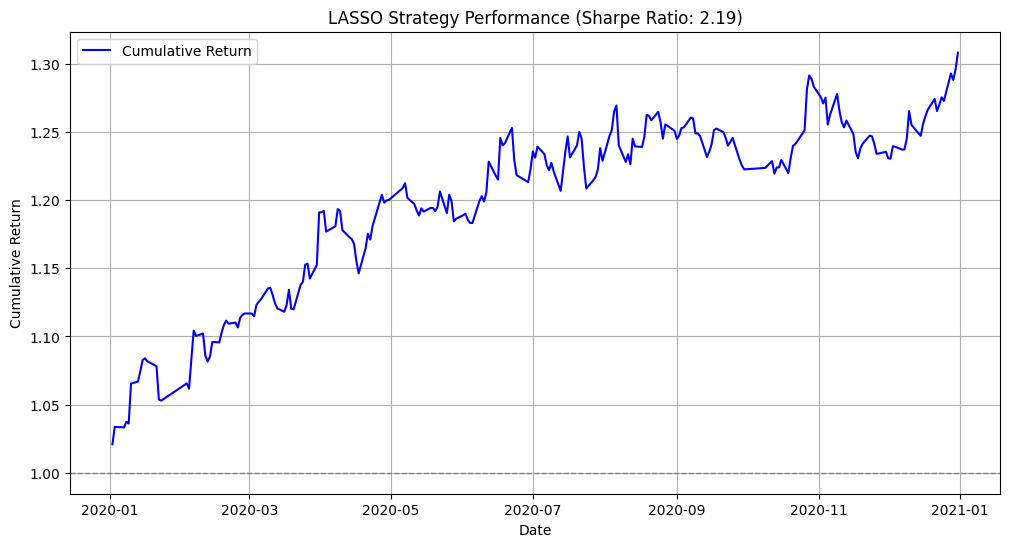

In [29]:
import matplotlib.pyplot as plt
plot_results(daily_returns_df, sharpe_ratio)

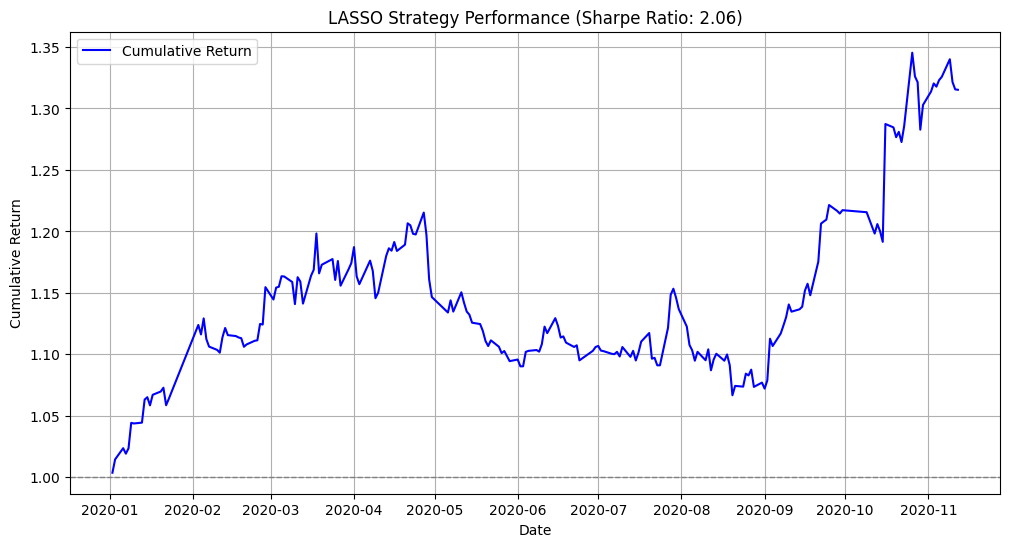

In [13]:
import matplotlib.pyplot as plt
daily_returns_df = daily_returns_df.iloc[:-35]
plot_results(daily_returns_df, sharpe_ratio)

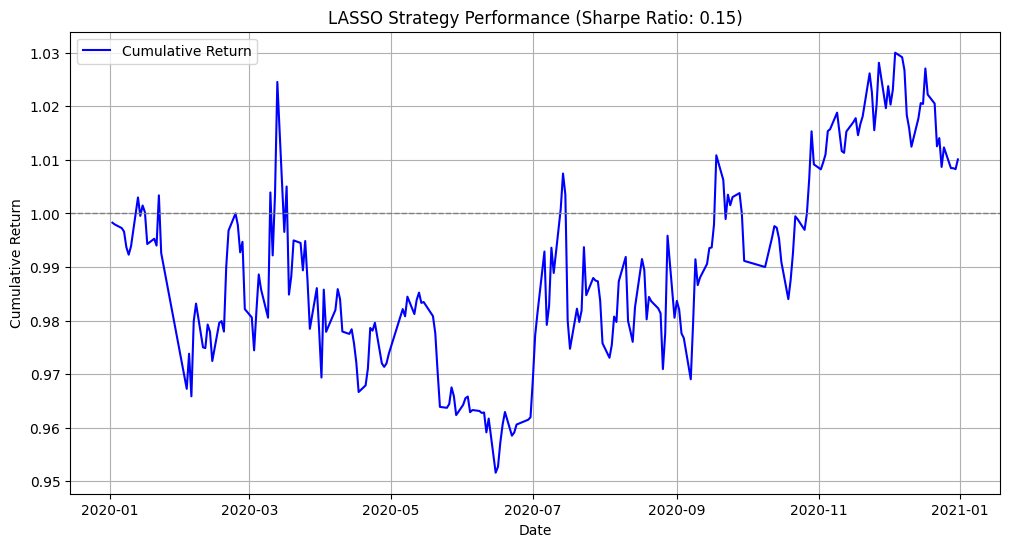

In [14]:
import matplotlib.pyplot as plt
plot_results(daily_returns_df, sharpe_ratio)